### Prediction of previously used data

We begin by studying the data used by Sanchez-Gonzalez _et al._ and making our own predictions on it. Let's first get the delay between the two pulses and all inputs as features (and also process them):

In [1]:
import os
os.chdir("..")

In [3]:
import time, yaml
import logging.config
stream = open('log_config.yml', 'r')
conf = yaml.load_all(stream)
conf["logfile"] = "doublePulse2017_%s.log" % str(time.time())
logging.config.dictConfig(conf, disable_existing_loggers=False)
from utility.pipelines import ann

ann.info()

FileNotFoundError: [Errno 2] No such file or directory: 'log_config.yml'

In [2]:
from doublePulse2017.code.setup import get_data
data = get_data()  # get data first of all

Filtering output columns...
2 columns left.
Filtering events...
38825 events left.
Filtering MAD & Energy...
32435 events left.
Filtering input columns...
101 columns left.
Done.


#### Use an ANN

We begin by simply fitting an ANN to the data. Using hyperparametrization before, we found the ideal parameters:

* 2 hidden layers of 20 nodes each
* ReLU activation function
* no drop out or batch normalization
* l2 regularization

Fitting the ann with these parameters across 5,000 epochs:

In [3]:
from utility.pipelines.ann import *

2022-01-12 12:28:45.558984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 12:28:45.559032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2022-01-12 12:28:47.518624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-12 12:28:47.518677: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-12 12:28:47.518724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karim-ThinkPad-E595): /proc/driver/nvidia/version does not exist
2022-01-12 12:28:47.519233: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/karim/PycharmProjects/XFEL-ML/utility/plotting/plot_fit.py:5: UserWarning: Style includes a param

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300173     1.062642e+09        0.007649       -0.031956   
train_std      0.003872     2.390804e+07        0.084923        0.249703   
test_mean      0.300187     1.062697e+09        0.009017       -0.036651   
test_std       0.003934     2.365689e+07        0.084525        0.248521   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.280187    -0.131378     0.208090      0.068914   
train_std        6.214577     0.217962     0.224714      0.016491   
test_mean     3485.431530    -0.126109     0.202577      0.069067   
test_std         6.196988     0.217246     0.224185      0.016251   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016695     -0.263416  ...                   2.180839   
train_std       0.002924      0.028723  ...                   0.008174   
test_mean       0.016699     -0.263063  ...        

2022-01-10 16:12:56.800176: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-10 16:12:56.818494: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2096185000 Hz


24/24 - 1s - loss: 1.4037 - mae: 0.8750 - val_loss: 1.3931 - val_mae: 0.8655
Epoch 2/5000
24/24 - 0s - loss: 1.3702 - mae: 0.8435 - val_loss: 1.3663 - val_mae: 0.8406
Epoch 3/5000
24/24 - 0s - loss: 1.3449 - mae: 0.8201 - val_loss: 1.3447 - val_mae: 0.8208
Epoch 4/5000
24/24 - 0s - loss: 1.3240 - mae: 0.8009 - val_loss: 1.3264 - val_mae: 0.8042
Epoch 5/5000
24/24 - 0s - loss: 1.3060 - mae: 0.7847 - val_loss: 1.3103 - val_mae: 0.7898
Epoch 6/5000
24/24 - 0s - loss: 1.2903 - mae: 0.7706 - val_loss: 1.2959 - val_mae: 0.7770
Epoch 7/5000
24/24 - 0s - loss: 1.2761 - mae: 0.7580 - val_loss: 1.2828 - val_mae: 0.7655
Epoch 8/5000
24/24 - 0s - loss: 1.2633 - mae: 0.7467 - val_loss: 1.2707 - val_mae: 0.7550
Epoch 9/5000
24/24 - 0s - loss: 1.2514 - mae: 0.7364 - val_loss: 1.2594 - val_mae: 0.7452
Epoch 10/5000
24/24 - 0s - loss: 1.2404 - mae: 0.7269 - val_loss: 1.2489 - val_mae: 0.7362
Epoch 11/5000
24/24 - 0s - loss: 1.2301 - mae: 0.7180 - val_loss: 1.2390 - val_mae: 0.7277
Epoch 12/5000
24/24 -

Epoch 92/5000
24/24 - 0s - loss: 0.8618 - mae: 0.4356 - val_loss: 0.8731 - val_mae: 0.4475
Epoch 93/5000
24/24 - 0s - loss: 0.8592 - mae: 0.4340 - val_loss: 0.8706 - val_mae: 0.4458
Epoch 94/5000
24/24 - 0s - loss: 0.8567 - mae: 0.4323 - val_loss: 0.8682 - val_mae: 0.4442
Epoch 95/5000
24/24 - 0s - loss: 0.8543 - mae: 0.4307 - val_loss: 0.8657 - val_mae: 0.4425
Epoch 96/5000
24/24 - 0s - loss: 0.8518 - mae: 0.4291 - val_loss: 0.8632 - val_mae: 0.4409
Epoch 97/5000
24/24 - 0s - loss: 0.8494 - mae: 0.4275 - val_loss: 0.8608 - val_mae: 0.4393
Epoch 98/5000
24/24 - 0s - loss: 0.8470 - mae: 0.4259 - val_loss: 0.8584 - val_mae: 0.4378
Epoch 99/5000
24/24 - 0s - loss: 0.8446 - mae: 0.4243 - val_loss: 0.8561 - val_mae: 0.4362
Epoch 100/5000
24/24 - 0s - loss: 0.8422 - mae: 0.4228 - val_loss: 0.8538 - val_mae: 0.4347
Epoch 101/5000
24/24 - 0s - loss: 0.8399 - mae: 0.4213 - val_loss: 0.8515 - val_mae: 0.4333
Epoch 102/5000
24/24 - 0s - loss: 0.8376 - mae: 0.4198 - val_loss: 0.8492 - val_mae: 0.4

24/24 - 0s - loss: 0.7016 - mae: 0.3399 - val_loss: 0.7145 - val_mae: 0.3531
Epoch 182/5000
24/24 - 0s - loss: 0.7003 - mae: 0.3392 - val_loss: 0.7132 - val_mae: 0.3524
Epoch 183/5000
24/24 - 0s - loss: 0.6990 - mae: 0.3385 - val_loss: 0.7119 - val_mae: 0.3517
Epoch 184/5000
24/24 - 0s - loss: 0.6977 - mae: 0.3378 - val_loss: 0.7106 - val_mae: 0.3511
Epoch 185/5000
24/24 - 0s - loss: 0.6964 - mae: 0.3372 - val_loss: 0.7094 - val_mae: 0.3505
Epoch 186/5000
24/24 - 0s - loss: 0.6952 - mae: 0.3365 - val_loss: 0.7081 - val_mae: 0.3498
Epoch 187/5000
24/24 - 0s - loss: 0.6939 - mae: 0.3359 - val_loss: 0.7069 - val_mae: 0.3492
Epoch 188/5000
24/24 - 0s - loss: 0.6926 - mae: 0.3352 - val_loss: 0.7056 - val_mae: 0.3486
Epoch 189/5000
24/24 - 0s - loss: 0.6914 - mae: 0.3346 - val_loss: 0.7044 - val_mae: 0.3479
Epoch 190/5000
24/24 - 0s - loss: 0.6901 - mae: 0.3339 - val_loss: 0.7032 - val_mae: 0.3473
Epoch 191/5000
24/24 - 0s - loss: 0.6889 - mae: 0.3333 - val_loss: 0.7020 - val_mae: 0.3467
Epo

Epoch 271/5000
24/24 - 0s - loss: 0.6085 - mae: 0.2959 - val_loss: 0.6218 - val_mae: 0.3094
Epoch 272/5000
24/24 - 0s - loss: 0.6077 - mae: 0.2955 - val_loss: 0.6210 - val_mae: 0.3091
Epoch 273/5000
24/24 - 0s - loss: 0.6068 - mae: 0.2952 - val_loss: 0.6202 - val_mae: 0.3087
Epoch 274/5000
24/24 - 0s - loss: 0.6060 - mae: 0.2948 - val_loss: 0.6193 - val_mae: 0.3084
Epoch 275/5000
24/24 - 0s - loss: 0.6052 - mae: 0.2945 - val_loss: 0.6185 - val_mae: 0.3080
Epoch 276/5000
24/24 - 0s - loss: 0.6044 - mae: 0.2942 - val_loss: 0.6177 - val_mae: 0.3077
Epoch 277/5000
24/24 - 0s - loss: 0.6036 - mae: 0.2938 - val_loss: 0.6169 - val_mae: 0.3073
Epoch 278/5000
24/24 - 0s - loss: 0.6028 - mae: 0.2935 - val_loss: 0.6160 - val_mae: 0.3070
Epoch 279/5000
24/24 - 0s - loss: 0.6020 - mae: 0.2932 - val_loss: 0.6152 - val_mae: 0.3066
Epoch 280/5000
24/24 - 0s - loss: 0.6012 - mae: 0.2929 - val_loss: 0.6144 - val_mae: 0.3063
Epoch 281/5000
24/24 - 0s - loss: 0.6004 - mae: 0.2925 - val_loss: 0.6136 - val_

24/24 - 0s - loss: 0.5457 - mae: 0.2712 - val_loss: 0.5582 - val_mae: 0.2839
Epoch 361/5000
24/24 - 0s - loss: 0.5451 - mae: 0.2710 - val_loss: 0.5576 - val_mae: 0.2837
Epoch 362/5000
24/24 - 0s - loss: 0.5445 - mae: 0.2708 - val_loss: 0.5570 - val_mae: 0.2835
Epoch 363/5000
24/24 - 0s - loss: 0.5439 - mae: 0.2705 - val_loss: 0.5564 - val_mae: 0.2833
Epoch 364/5000
24/24 - 0s - loss: 0.5433 - mae: 0.2703 - val_loss: 0.5558 - val_mae: 0.2830
Epoch 365/5000
24/24 - 0s - loss: 0.5427 - mae: 0.2701 - val_loss: 0.5552 - val_mae: 0.2828
Epoch 366/5000
24/24 - 0s - loss: 0.5421 - mae: 0.2699 - val_loss: 0.5546 - val_mae: 0.2826
Epoch 367/5000
24/24 - 0s - loss: 0.5415 - mae: 0.2696 - val_loss: 0.5540 - val_mae: 0.2824
Epoch 368/5000
24/24 - 0s - loss: 0.5409 - mae: 0.2694 - val_loss: 0.5534 - val_mae: 0.2822
Epoch 369/5000
24/24 - 0s - loss: 0.5403 - mae: 0.2692 - val_loss: 0.5528 - val_mae: 0.2820
Epoch 370/5000
24/24 - 0s - loss: 0.5397 - mae: 0.2690 - val_loss: 0.5522 - val_mae: 0.2817
Epo

Epoch 450/5000
24/24 - 0s - loss: 0.4972 - mae: 0.2537 - val_loss: 0.5099 - val_mae: 0.2665
Epoch 451/5000
24/24 - 0s - loss: 0.4967 - mae: 0.2536 - val_loss: 0.5094 - val_mae: 0.2664
Epoch 452/5000
24/24 - 0s - loss: 0.4963 - mae: 0.2534 - val_loss: 0.5089 - val_mae: 0.2662
Epoch 453/5000
24/24 - 0s - loss: 0.4958 - mae: 0.2532 - val_loss: 0.5084 - val_mae: 0.2660
Epoch 454/5000
24/24 - 0s - loss: 0.4953 - mae: 0.2531 - val_loss: 0.5080 - val_mae: 0.2659
Epoch 455/5000
24/24 - 0s - loss: 0.4949 - mae: 0.2529 - val_loss: 0.5075 - val_mae: 0.2657
Epoch 456/5000
24/24 - 0s - loss: 0.4944 - mae: 0.2528 - val_loss: 0.5070 - val_mae: 0.2655
Epoch 457/5000
24/24 - 0s - loss: 0.4939 - mae: 0.2526 - val_loss: 0.5066 - val_mae: 0.2654
Epoch 458/5000
24/24 - 0s - loss: 0.4935 - mae: 0.2525 - val_loss: 0.5061 - val_mae: 0.2652
Epoch 459/5000
24/24 - 0s - loss: 0.4930 - mae: 0.2523 - val_loss: 0.5056 - val_mae: 0.2651
Epoch 460/5000
24/24 - 0s - loss: 0.4926 - mae: 0.2521 - val_loss: 0.5052 - val_

24/24 - 0s - loss: 0.4596 - mae: 0.2412 - val_loss: 0.4718 - val_mae: 0.2535
Epoch 540/5000
24/24 - 0s - loss: 0.4593 - mae: 0.2411 - val_loss: 0.4714 - val_mae: 0.2533
Epoch 541/5000
24/24 - 0s - loss: 0.4589 - mae: 0.2409 - val_loss: 0.4710 - val_mae: 0.2532
Epoch 542/5000
24/24 - 0s - loss: 0.4585 - mae: 0.2408 - val_loss: 0.4706 - val_mae: 0.2531
Epoch 543/5000
24/24 - 0s - loss: 0.4581 - mae: 0.2407 - val_loss: 0.4703 - val_mae: 0.2529
Epoch 544/5000
24/24 - 0s - loss: 0.4578 - mae: 0.2406 - val_loss: 0.4699 - val_mae: 0.2528
Epoch 545/5000
24/24 - 0s - loss: 0.4574 - mae: 0.2405 - val_loss: 0.4695 - val_mae: 0.2527
Epoch 546/5000
24/24 - 0s - loss: 0.4570 - mae: 0.2403 - val_loss: 0.4691 - val_mae: 0.2526
Epoch 547/5000
24/24 - 0s - loss: 0.4567 - mae: 0.2402 - val_loss: 0.4687 - val_mae: 0.2525
Epoch 548/5000
24/24 - 0s - loss: 0.4563 - mae: 0.2401 - val_loss: 0.4684 - val_mae: 0.2523
Epoch 549/5000
24/24 - 0s - loss: 0.4559 - mae: 0.2400 - val_loss: 0.4680 - val_mae: 0.2522
Epo

Epoch 629/5000
24/24 - 0s - loss: 0.4290 - mae: 0.2315 - val_loss: 0.4407 - val_mae: 0.2434
Epoch 630/5000
24/24 - 0s - loss: 0.4287 - mae: 0.2315 - val_loss: 0.4404 - val_mae: 0.2433
Epoch 631/5000
24/24 - 0s - loss: 0.4284 - mae: 0.2314 - val_loss: 0.4401 - val_mae: 0.2432
Epoch 632/5000
24/24 - 0s - loss: 0.4281 - mae: 0.2313 - val_loss: 0.4398 - val_mae: 0.2431
Epoch 633/5000
24/24 - 0s - loss: 0.4278 - mae: 0.2312 - val_loss: 0.4394 - val_mae: 0.2430
Epoch 634/5000
24/24 - 0s - loss: 0.4275 - mae: 0.2311 - val_loss: 0.4391 - val_mae: 0.2429
Epoch 635/5000
24/24 - 0s - loss: 0.4271 - mae: 0.2310 - val_loss: 0.4388 - val_mae: 0.2428
Epoch 636/5000
24/24 - 0s - loss: 0.4268 - mae: 0.2309 - val_loss: 0.4385 - val_mae: 0.2427
Epoch 637/5000
24/24 - 0s - loss: 0.4265 - mae: 0.2308 - val_loss: 0.4382 - val_mae: 0.2426
Epoch 638/5000
24/24 - 0s - loss: 0.4262 - mae: 0.2307 - val_loss: 0.4379 - val_mae: 0.2425
Epoch 639/5000
24/24 - 0s - loss: 0.4259 - mae: 0.2306 - val_loss: 0.4376 - val_

24/24 - 0s - loss: 0.4042 - mae: 0.2243 - val_loss: 0.4153 - val_mae: 0.2355
Epoch 719/5000
24/24 - 0s - loss: 0.4039 - mae: 0.2242 - val_loss: 0.4150 - val_mae: 0.2354
Epoch 720/5000
24/24 - 0s - loss: 0.4037 - mae: 0.2241 - val_loss: 0.4148 - val_mae: 0.2353
Epoch 721/5000
24/24 - 0s - loss: 0.4034 - mae: 0.2241 - val_loss: 0.4145 - val_mae: 0.2352
Epoch 722/5000
24/24 - 0s - loss: 0.4032 - mae: 0.2240 - val_loss: 0.4142 - val_mae: 0.2352
Epoch 723/5000
24/24 - 0s - loss: 0.4029 - mae: 0.2239 - val_loss: 0.4140 - val_mae: 0.2351
Epoch 724/5000
24/24 - 0s - loss: 0.4027 - mae: 0.2239 - val_loss: 0.4137 - val_mae: 0.2350
Epoch 725/5000
24/24 - 0s - loss: 0.4024 - mae: 0.2238 - val_loss: 0.4134 - val_mae: 0.2349
Epoch 726/5000
24/24 - 0s - loss: 0.4022 - mae: 0.2237 - val_loss: 0.4132 - val_mae: 0.2348
Epoch 727/5000
24/24 - 0s - loss: 0.4019 - mae: 0.2237 - val_loss: 0.4129 - val_mae: 0.2348
Epoch 728/5000
24/24 - 0s - loss: 0.4017 - mae: 0.2236 - val_loss: 0.4127 - val_mae: 0.2347
Epo

Epoch 808/5000
24/24 - 0s - loss: 0.3833 - mae: 0.2185 - val_loss: 0.3935 - val_mae: 0.2288
Epoch 809/5000
24/24 - 0s - loss: 0.3831 - mae: 0.2185 - val_loss: 0.3933 - val_mae: 0.2288
Epoch 810/5000
24/24 - 0s - loss: 0.3828 - mae: 0.2184 - val_loss: 0.3931 - val_mae: 0.2287
Epoch 811/5000
24/24 - 0s - loss: 0.3826 - mae: 0.2184 - val_loss: 0.3928 - val_mae: 0.2286
Epoch 812/5000
24/24 - 0s - loss: 0.3824 - mae: 0.2183 - val_loss: 0.3926 - val_mae: 0.2286
Epoch 813/5000
24/24 - 0s - loss: 0.3822 - mae: 0.2182 - val_loss: 0.3924 - val_mae: 0.2285
Epoch 814/5000
24/24 - 0s - loss: 0.3820 - mae: 0.2182 - val_loss: 0.3922 - val_mae: 0.2285
Epoch 815/5000
24/24 - 0s - loss: 0.3818 - mae: 0.2181 - val_loss: 0.3920 - val_mae: 0.2284
Epoch 816/5000
24/24 - 0s - loss: 0.3816 - mae: 0.2181 - val_loss: 0.3917 - val_mae: 0.2283
Epoch 817/5000
24/24 - 0s - loss: 0.3814 - mae: 0.2180 - val_loss: 0.3915 - val_mae: 0.2283
Epoch 818/5000
24/24 - 0s - loss: 0.3812 - mae: 0.2180 - val_loss: 0.3913 - val_

24/24 - 0s - loss: 0.3658 - mae: 0.2139 - val_loss: 0.3753 - val_mae: 0.2235
Epoch 898/5000
24/24 - 0s - loss: 0.3656 - mae: 0.2139 - val_loss: 0.3752 - val_mae: 0.2235
Epoch 899/5000
24/24 - 0s - loss: 0.3654 - mae: 0.2138 - val_loss: 0.3750 - val_mae: 0.2234
Epoch 900/5000
24/24 - 0s - loss: 0.3653 - mae: 0.2138 - val_loss: 0.3748 - val_mae: 0.2234
Epoch 901/5000
24/24 - 0s - loss: 0.3651 - mae: 0.2137 - val_loss: 0.3746 - val_mae: 0.2233
Epoch 902/5000
24/24 - 0s - loss: 0.3649 - mae: 0.2137 - val_loss: 0.3744 - val_mae: 0.2233
Epoch 903/5000
24/24 - 0s - loss: 0.3647 - mae: 0.2137 - val_loss: 0.3742 - val_mae: 0.2232
Epoch 904/5000
24/24 - 0s - loss: 0.3645 - mae: 0.2136 - val_loss: 0.3740 - val_mae: 0.2232
Epoch 905/5000
24/24 - 0s - loss: 0.3644 - mae: 0.2136 - val_loss: 0.3739 - val_mae: 0.2231
Epoch 906/5000
24/24 - 0s - loss: 0.3642 - mae: 0.2135 - val_loss: 0.3737 - val_mae: 0.2231
Epoch 907/5000
24/24 - 0s - loss: 0.3640 - mae: 0.2135 - val_loss: 0.3735 - val_mae: 0.2230
Epo

Epoch 987/5000
24/24 - 0s - loss: 0.3507 - mae: 0.2102 - val_loss: 0.3601 - val_mae: 0.2195
Epoch 988/5000
24/24 - 0s - loss: 0.3506 - mae: 0.2101 - val_loss: 0.3599 - val_mae: 0.2195
Epoch 989/5000
24/24 - 0s - loss: 0.3504 - mae: 0.2101 - val_loss: 0.3597 - val_mae: 0.2195
Epoch 990/5000
24/24 - 0s - loss: 0.3503 - mae: 0.2101 - val_loss: 0.3596 - val_mae: 0.2194
Epoch 991/5000
24/24 - 0s - loss: 0.3501 - mae: 0.2100 - val_loss: 0.3594 - val_mae: 0.2194
Epoch 992/5000
24/24 - 0s - loss: 0.3500 - mae: 0.2100 - val_loss: 0.3593 - val_mae: 0.2194
Epoch 993/5000
24/24 - 0s - loss: 0.3498 - mae: 0.2099 - val_loss: 0.3591 - val_mae: 0.2193
Epoch 994/5000
24/24 - 0s - loss: 0.3497 - mae: 0.2099 - val_loss: 0.3590 - val_mae: 0.2193
Epoch 995/5000
24/24 - 0s - loss: 0.3495 - mae: 0.2099 - val_loss: 0.3588 - val_mae: 0.2192
Epoch 996/5000
24/24 - 0s - loss: 0.3494 - mae: 0.2098 - val_loss: 0.3587 - val_mae: 0.2192
Epoch 997/5000
24/24 - 0s - loss: 0.3492 - mae: 0.2098 - val_loss: 0.3585 - val_

Epoch 1076/5000
24/24 - 0s - loss: 0.3380 - mae: 0.2072 - val_loss: 0.3471 - val_mae: 0.2164
Epoch 1077/5000
24/24 - 0s - loss: 0.3379 - mae: 0.2072 - val_loss: 0.3470 - val_mae: 0.2163
Epoch 1078/5000
24/24 - 0s - loss: 0.3378 - mae: 0.2072 - val_loss: 0.3468 - val_mae: 0.2163
Epoch 1079/5000
24/24 - 0s - loss: 0.3376 - mae: 0.2071 - val_loss: 0.3467 - val_mae: 0.2163
Epoch 1080/5000
24/24 - 0s - loss: 0.3375 - mae: 0.2071 - val_loss: 0.3466 - val_mae: 0.2162
Epoch 1081/5000
24/24 - 0s - loss: 0.3374 - mae: 0.2071 - val_loss: 0.3464 - val_mae: 0.2162
Epoch 1082/5000
24/24 - 0s - loss: 0.3372 - mae: 0.2070 - val_loss: 0.3463 - val_mae: 0.2162
Epoch 1083/5000
24/24 - 0s - loss: 0.3371 - mae: 0.2070 - val_loss: 0.3462 - val_mae: 0.2161
Epoch 1084/5000
24/24 - 0s - loss: 0.3370 - mae: 0.2070 - val_loss: 0.3460 - val_mae: 0.2161
Epoch 1085/5000
24/24 - 0s - loss: 0.3368 - mae: 0.2069 - val_loss: 0.3459 - val_mae: 0.2161
Epoch 1086/5000
24/24 - 0s - loss: 0.3367 - mae: 0.2069 - val_loss: 0.

24/24 - 0s - loss: 0.3271 - mae: 0.2048 - val_loss: 0.3361 - val_mae: 0.2139
Epoch 1165/5000
24/24 - 0s - loss: 0.3270 - mae: 0.2048 - val_loss: 0.3360 - val_mae: 0.2138
Epoch 1166/5000
24/24 - 0s - loss: 0.3269 - mae: 0.2047 - val_loss: 0.3359 - val_mae: 0.2138
Epoch 1167/5000
24/24 - 0s - loss: 0.3267 - mae: 0.2047 - val_loss: 0.3358 - val_mae: 0.2138
Epoch 1168/5000
24/24 - 0s - loss: 0.3266 - mae: 0.2047 - val_loss: 0.3357 - val_mae: 0.2138
Epoch 1169/5000
24/24 - 0s - loss: 0.3265 - mae: 0.2047 - val_loss: 0.3356 - val_mae: 0.2138
Epoch 1170/5000
24/24 - 0s - loss: 0.3264 - mae: 0.2046 - val_loss: 0.3354 - val_mae: 0.2137
Epoch 1171/5000
24/24 - 0s - loss: 0.3263 - mae: 0.2046 - val_loss: 0.3353 - val_mae: 0.2137
Epoch 1172/5000
24/24 - 0s - loss: 0.3262 - mae: 0.2046 - val_loss: 0.3352 - val_mae: 0.2137
Epoch 1173/5000
24/24 - 0s - loss: 0.3261 - mae: 0.2046 - val_loss: 0.3351 - val_mae: 0.2137
Epoch 1174/5000
24/24 - 0s - loss: 0.3259 - mae: 0.2045 - val_loss: 0.3350 - val_mae: 

Epoch 1253/5000
24/24 - 0s - loss: 0.3175 - mae: 0.2028 - val_loss: 0.3265 - val_mae: 0.2119
Epoch 1254/5000
24/24 - 0s - loss: 0.3174 - mae: 0.2028 - val_loss: 0.3264 - val_mae: 0.2119
Epoch 1255/5000
24/24 - 0s - loss: 0.3173 - mae: 0.2028 - val_loss: 0.3263 - val_mae: 0.2119
Epoch 1256/5000
24/24 - 0s - loss: 0.3172 - mae: 0.2027 - val_loss: 0.3262 - val_mae: 0.2118
Epoch 1257/5000
24/24 - 0s - loss: 0.3171 - mae: 0.2027 - val_loss: 0.3261 - val_mae: 0.2118
Epoch 1258/5000
24/24 - 0s - loss: 0.3170 - mae: 0.2027 - val_loss: 0.3260 - val_mae: 0.2118
Epoch 1259/5000
24/24 - 0s - loss: 0.3169 - mae: 0.2027 - val_loss: 0.3259 - val_mae: 0.2118
Epoch 1260/5000
24/24 - 0s - loss: 0.3168 - mae: 0.2026 - val_loss: 0.3258 - val_mae: 0.2118
Epoch 1261/5000
24/24 - 0s - loss: 0.3167 - mae: 0.2026 - val_loss: 0.3257 - val_mae: 0.2117
Epoch 1262/5000
24/24 - 0s - loss: 0.3166 - mae: 0.2026 - val_loss: 0.3256 - val_mae: 0.2117
Epoch 1263/5000
24/24 - 0s - loss: 0.3165 - mae: 0.2026 - val_loss: 0.

24/24 - 0s - loss: 0.3091 - mae: 0.2011 - val_loss: 0.3182 - val_mae: 0.2102
Epoch 1342/5000
24/24 - 0s - loss: 0.3090 - mae: 0.2011 - val_loss: 0.3181 - val_mae: 0.2102
Epoch 1343/5000
24/24 - 0s - loss: 0.3089 - mae: 0.2011 - val_loss: 0.3180 - val_mae: 0.2102
Epoch 1344/5000
24/24 - 0s - loss: 0.3088 - mae: 0.2010 - val_loss: 0.3179 - val_mae: 0.2102
Epoch 1345/5000
24/24 - 0s - loss: 0.3087 - mae: 0.2010 - val_loss: 0.3178 - val_mae: 0.2102
Epoch 1346/5000
24/24 - 0s - loss: 0.3086 - mae: 0.2010 - val_loss: 0.3177 - val_mae: 0.2102
Epoch 1347/5000
24/24 - 0s - loss: 0.3085 - mae: 0.2010 - val_loss: 0.3176 - val_mae: 0.2101
Epoch 1348/5000
24/24 - 0s - loss: 0.3084 - mae: 0.2010 - val_loss: 0.3175 - val_mae: 0.2101
Epoch 1349/5000
24/24 - 0s - loss: 0.3084 - mae: 0.2010 - val_loss: 0.3175 - val_mae: 0.2101
Epoch 1350/5000
24/24 - 0s - loss: 0.3083 - mae: 0.2009 - val_loss: 0.3174 - val_mae: 0.2101
Epoch 1351/5000
24/24 - 0s - loss: 0.3082 - mae: 0.2009 - val_loss: 0.3173 - val_mae: 

Epoch 1430/5000
24/24 - 0s - loss: 0.3016 - mae: 0.1997 - val_loss: 0.3107 - val_mae: 0.2089
Epoch 1431/5000
24/24 - 0s - loss: 0.3015 - mae: 0.1996 - val_loss: 0.3106 - val_mae: 0.2088
Epoch 1432/5000
24/24 - 0s - loss: 0.3014 - mae: 0.1996 - val_loss: 0.3106 - val_mae: 0.2088
Epoch 1433/5000
24/24 - 0s - loss: 0.3013 - mae: 0.1996 - val_loss: 0.3105 - val_mae: 0.2088
Epoch 1434/5000
24/24 - 0s - loss: 0.3012 - mae: 0.1996 - val_loss: 0.3104 - val_mae: 0.2088
Epoch 1435/5000
24/24 - 0s - loss: 0.3012 - mae: 0.1996 - val_loss: 0.3103 - val_mae: 0.2088
Epoch 1436/5000
24/24 - 0s - loss: 0.3011 - mae: 0.1996 - val_loss: 0.3102 - val_mae: 0.2088
Epoch 1437/5000
24/24 - 0s - loss: 0.3010 - mae: 0.1995 - val_loss: 0.3102 - val_mae: 0.2087
Epoch 1438/5000
24/24 - 0s - loss: 0.3009 - mae: 0.1995 - val_loss: 0.3101 - val_mae: 0.2087
Epoch 1439/5000
24/24 - 0s - loss: 0.3008 - mae: 0.1995 - val_loss: 0.3100 - val_mae: 0.2087
Epoch 1440/5000
24/24 - 0s - loss: 0.3008 - mae: 0.1995 - val_loss: 0.

24/24 - 0s - loss: 0.2949 - mae: 0.1984 - val_loss: 0.3042 - val_mae: 0.2077
Epoch 1519/5000
24/24 - 0s - loss: 0.2949 - mae: 0.1984 - val_loss: 0.3041 - val_mae: 0.2077
Epoch 1520/5000
24/24 - 0s - loss: 0.2948 - mae: 0.1984 - val_loss: 0.3040 - val_mae: 0.2077
Epoch 1521/5000
24/24 - 0s - loss: 0.2947 - mae: 0.1984 - val_loss: 0.3040 - val_mae: 0.2077
Epoch 1522/5000
24/24 - 0s - loss: 0.2947 - mae: 0.1984 - val_loss: 0.3039 - val_mae: 0.2077
Epoch 1523/5000
24/24 - 0s - loss: 0.2946 - mae: 0.1984 - val_loss: 0.3038 - val_mae: 0.2077
Epoch 1524/5000
24/24 - 0s - loss: 0.2945 - mae: 0.1984 - val_loss: 0.3038 - val_mae: 0.2077
Epoch 1525/5000
24/24 - 0s - loss: 0.2944 - mae: 0.1984 - val_loss: 0.3037 - val_mae: 0.2076
Epoch 1526/5000
24/24 - 0s - loss: 0.2944 - mae: 0.1983 - val_loss: 0.3036 - val_mae: 0.2076
Epoch 1527/5000
24/24 - 0s - loss: 0.2943 - mae: 0.1983 - val_loss: 0.3036 - val_mae: 0.2076
Epoch 1528/5000
24/24 - 0s - loss: 0.2942 - mae: 0.1983 - val_loss: 0.3035 - val_mae: 

Epoch 1607/5000
24/24 - 0s - loss: 0.2889 - mae: 0.1974 - val_loss: 0.2982 - val_mae: 0.2067
Epoch 1608/5000
24/24 - 0s - loss: 0.2889 - mae: 0.1974 - val_loss: 0.2981 - val_mae: 0.2067
Epoch 1609/5000
24/24 - 0s - loss: 0.2888 - mae: 0.1973 - val_loss: 0.2981 - val_mae: 0.2067
Epoch 1610/5000
24/24 - 0s - loss: 0.2887 - mae: 0.1973 - val_loss: 0.2980 - val_mae: 0.2067
Epoch 1611/5000
24/24 - 0s - loss: 0.2887 - mae: 0.1973 - val_loss: 0.2980 - val_mae: 0.2067
Epoch 1612/5000
24/24 - 0s - loss: 0.2886 - mae: 0.1973 - val_loss: 0.2979 - val_mae: 0.2066
Epoch 1613/5000
24/24 - 0s - loss: 0.2885 - mae: 0.1973 - val_loss: 0.2978 - val_mae: 0.2066
Epoch 1614/5000
24/24 - 0s - loss: 0.2885 - mae: 0.1973 - val_loss: 0.2978 - val_mae: 0.2066
Epoch 1615/5000
24/24 - 0s - loss: 0.2884 - mae: 0.1973 - val_loss: 0.2977 - val_mae: 0.2066
Epoch 1616/5000
24/24 - 0s - loss: 0.2883 - mae: 0.1973 - val_loss: 0.2977 - val_mae: 0.2066
Epoch 1617/5000
24/24 - 0s - loss: 0.2883 - mae: 0.1973 - val_loss: 0.

24/24 - 0s - loss: 0.2836 - mae: 0.1964 - val_loss: 0.2929 - val_mae: 0.2057
Epoch 1696/5000
24/24 - 0s - loss: 0.2835 - mae: 0.1964 - val_loss: 0.2928 - val_mae: 0.2057
Epoch 1697/5000
24/24 - 0s - loss: 0.2834 - mae: 0.1964 - val_loss: 0.2928 - val_mae: 0.2057
Epoch 1698/5000
24/24 - 0s - loss: 0.2834 - mae: 0.1964 - val_loss: 0.2927 - val_mae: 0.2057
Epoch 1699/5000
24/24 - 0s - loss: 0.2833 - mae: 0.1964 - val_loss: 0.2926 - val_mae: 0.2057
Epoch 1700/5000
24/24 - 0s - loss: 0.2833 - mae: 0.1964 - val_loss: 0.2926 - val_mae: 0.2057
Epoch 1701/5000
24/24 - 0s - loss: 0.2832 - mae: 0.1964 - val_loss: 0.2925 - val_mae: 0.2057
Epoch 1702/5000
24/24 - 0s - loss: 0.2832 - mae: 0.1963 - val_loss: 0.2925 - val_mae: 0.2057
Epoch 1703/5000
24/24 - 0s - loss: 0.2831 - mae: 0.1963 - val_loss: 0.2924 - val_mae: 0.2057
Epoch 1704/5000
24/24 - 0s - loss: 0.2831 - mae: 0.1963 - val_loss: 0.2924 - val_mae: 0.2057
Epoch 1705/5000
24/24 - 0s - loss: 0.2830 - mae: 0.1963 - val_loss: 0.2923 - val_mae: 

Epoch 1784/5000
24/24 - 0s - loss: 0.2787 - mae: 0.1956 - val_loss: 0.2880 - val_mae: 0.2049
Epoch 1785/5000
24/24 - 0s - loss: 0.2786 - mae: 0.1956 - val_loss: 0.2879 - val_mae: 0.2049
Epoch 1786/5000
24/24 - 0s - loss: 0.2786 - mae: 0.1955 - val_loss: 0.2879 - val_mae: 0.2049
Epoch 1787/5000
24/24 - 0s - loss: 0.2785 - mae: 0.1955 - val_loss: 0.2878 - val_mae: 0.2049
Epoch 1788/5000
24/24 - 0s - loss: 0.2785 - mae: 0.1955 - val_loss: 0.2878 - val_mae: 0.2048
Epoch 1789/5000
24/24 - 0s - loss: 0.2784 - mae: 0.1955 - val_loss: 0.2877 - val_mae: 0.2048
Epoch 1790/5000
24/24 - 0s - loss: 0.2784 - mae: 0.1955 - val_loss: 0.2877 - val_mae: 0.2048
Epoch 1791/5000
24/24 - 0s - loss: 0.2783 - mae: 0.1955 - val_loss: 0.2876 - val_mae: 0.2048
Epoch 1792/5000
24/24 - 0s - loss: 0.2783 - mae: 0.1955 - val_loss: 0.2876 - val_mae: 0.2048
Epoch 1793/5000
24/24 - 0s - loss: 0.2782 - mae: 0.1955 - val_loss: 0.2875 - val_mae: 0.2048
Epoch 1794/5000
24/24 - 0s - loss: 0.2782 - mae: 0.1955 - val_loss: 0.

24/24 - 0s - loss: 0.2743 - mae: 0.1948 - val_loss: 0.2836 - val_mae: 0.2042
Epoch 1873/5000
24/24 - 0s - loss: 0.2742 - mae: 0.1948 - val_loss: 0.2836 - val_mae: 0.2042
Epoch 1874/5000
24/24 - 0s - loss: 0.2742 - mae: 0.1948 - val_loss: 0.2835 - val_mae: 0.2042
Epoch 1875/5000
24/24 - 0s - loss: 0.2741 - mae: 0.1948 - val_loss: 0.2835 - val_mae: 0.2042
Epoch 1876/5000
24/24 - 0s - loss: 0.2741 - mae: 0.1948 - val_loss: 0.2834 - val_mae: 0.2041
Epoch 1877/5000
24/24 - 0s - loss: 0.2740 - mae: 0.1947 - val_loss: 0.2834 - val_mae: 0.2041
Epoch 1878/5000
24/24 - 0s - loss: 0.2740 - mae: 0.1947 - val_loss: 0.2833 - val_mae: 0.2041
Epoch 1879/5000
24/24 - 0s - loss: 0.2739 - mae: 0.1947 - val_loss: 0.2833 - val_mae: 0.2041
Epoch 1880/5000
24/24 - 0s - loss: 0.2739 - mae: 0.1947 - val_loss: 0.2833 - val_mae: 0.2041
Epoch 1881/5000
24/24 - 0s - loss: 0.2738 - mae: 0.1947 - val_loss: 0.2832 - val_mae: 0.2041
Epoch 1882/5000
24/24 - 0s - loss: 0.2738 - mae: 0.1947 - val_loss: 0.2832 - val_mae: 

Epoch 1961/5000
24/24 - 0s - loss: 0.2702 - mae: 0.1941 - val_loss: 0.2797 - val_mae: 0.2035
Epoch 1962/5000
24/24 - 0s - loss: 0.2702 - mae: 0.1941 - val_loss: 0.2796 - val_mae: 0.2035
Epoch 1963/5000
24/24 - 0s - loss: 0.2701 - mae: 0.1941 - val_loss: 0.2796 - val_mae: 0.2035
Epoch 1964/5000
24/24 - 0s - loss: 0.2701 - mae: 0.1941 - val_loss: 0.2795 - val_mae: 0.2035
Epoch 1965/5000
24/24 - 0s - loss: 0.2700 - mae: 0.1940 - val_loss: 0.2795 - val_mae: 0.2035
Epoch 1966/5000
24/24 - 0s - loss: 0.2700 - mae: 0.1940 - val_loss: 0.2794 - val_mae: 0.2035
Epoch 1967/5000
24/24 - 0s - loss: 0.2699 - mae: 0.1940 - val_loss: 0.2794 - val_mae: 0.2035
Epoch 1968/5000
24/24 - 0s - loss: 0.2699 - mae: 0.1940 - val_loss: 0.2793 - val_mae: 0.2035
Epoch 1969/5000
24/24 - 0s - loss: 0.2699 - mae: 0.1940 - val_loss: 0.2793 - val_mae: 0.2035
Epoch 1970/5000
24/24 - 0s - loss: 0.2698 - mae: 0.1940 - val_loss: 0.2793 - val_mae: 0.2035
Epoch 1971/5000
24/24 - 0s - loss: 0.2698 - mae: 0.1940 - val_loss: 0.

24/24 - 0s - loss: 0.2665 - mae: 0.1934 - val_loss: 0.2761 - val_mae: 0.2030
Epoch 2050/5000
24/24 - 0s - loss: 0.2665 - mae: 0.1934 - val_loss: 0.2761 - val_mae: 0.2030
Epoch 2051/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1934 - val_loss: 0.2760 - val_mae: 0.2030
Epoch 2052/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1934 - val_loss: 0.2760 - val_mae: 0.2030
Epoch 2053/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1934 - val_loss: 0.2759 - val_mae: 0.2030
Epoch 2054/5000
24/24 - 0s - loss: 0.2663 - mae: 0.1934 - val_loss: 0.2759 - val_mae: 0.2030
Epoch 2055/5000
24/24 - 0s - loss: 0.2663 - mae: 0.1934 - val_loss: 0.2759 - val_mae: 0.2030
Epoch 2056/5000
24/24 - 0s - loss: 0.2662 - mae: 0.1934 - val_loss: 0.2758 - val_mae: 0.2030
Epoch 2057/5000
24/24 - 0s - loss: 0.2662 - mae: 0.1934 - val_loss: 0.2758 - val_mae: 0.2030
Epoch 2058/5000
24/24 - 0s - loss: 0.2662 - mae: 0.1934 - val_loss: 0.2757 - val_mae: 0.2030
Epoch 2059/5000
24/24 - 0s - loss: 0.2661 - mae: 0.1934 - val_loss: 0.2757 - val_mae: 

Epoch 2138/5000
24/24 - 0s - loss: 0.2631 - mae: 0.1928 - val_loss: 0.2728 - val_mae: 0.2025
Epoch 2139/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1928 - val_loss: 0.2727 - val_mae: 0.2025
Epoch 2140/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1928 - val_loss: 0.2727 - val_mae: 0.2025
Epoch 2141/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1928 - val_loss: 0.2727 - val_mae: 0.2025
Epoch 2142/5000
24/24 - 0s - loss: 0.2629 - mae: 0.1928 - val_loss: 0.2726 - val_mae: 0.2025
Epoch 2143/5000
24/24 - 0s - loss: 0.2629 - mae: 0.1928 - val_loss: 0.2726 - val_mae: 0.2025
Epoch 2144/5000
24/24 - 0s - loss: 0.2629 - mae: 0.1928 - val_loss: 0.2726 - val_mae: 0.2025
Epoch 2145/5000
24/24 - 0s - loss: 0.2628 - mae: 0.1928 - val_loss: 0.2725 - val_mae: 0.2025
Epoch 2146/5000
24/24 - 0s - loss: 0.2628 - mae: 0.1928 - val_loss: 0.2725 - val_mae: 0.2025
Epoch 2147/5000
24/24 - 0s - loss: 0.2628 - mae: 0.1928 - val_loss: 0.2725 - val_mae: 0.2025
Epoch 2148/5000
24/24 - 0s - loss: 0.2627 - mae: 0.1928 - val_loss: 0.

24/24 - 0s - loss: 0.2600 - mae: 0.1923 - val_loss: 0.2697 - val_mae: 0.2020
Epoch 2227/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1923 - val_loss: 0.2697 - val_mae: 0.2020
Epoch 2228/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1923 - val_loss: 0.2696 - val_mae: 0.2020
Epoch 2229/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1923 - val_loss: 0.2696 - val_mae: 0.2020
Epoch 2230/5000
24/24 - 0s - loss: 0.2598 - mae: 0.1923 - val_loss: 0.2696 - val_mae: 0.2020
Epoch 2231/5000
24/24 - 0s - loss: 0.2598 - mae: 0.1923 - val_loss: 0.2695 - val_mae: 0.2020
Epoch 2232/5000
24/24 - 0s - loss: 0.2598 - mae: 0.1922 - val_loss: 0.2695 - val_mae: 0.2020
Epoch 2233/5000
24/24 - 0s - loss: 0.2597 - mae: 0.1922 - val_loss: 0.2695 - val_mae: 0.2020
Epoch 2234/5000
24/24 - 0s - loss: 0.2597 - mae: 0.1922 - val_loss: 0.2694 - val_mae: 0.2020
Epoch 2235/5000
24/24 - 0s - loss: 0.2597 - mae: 0.1922 - val_loss: 0.2694 - val_mae: 0.2020
Epoch 2236/5000
24/24 - 0s - loss: 0.2596 - mae: 0.1922 - val_loss: 0.2694 - val_mae: 

Epoch 2315/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1918 - val_loss: 0.2668 - val_mae: 0.2015
Epoch 2316/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1918 - val_loss: 0.2667 - val_mae: 0.2015
Epoch 2317/5000
24/24 - 0s - loss: 0.2570 - mae: 0.1918 - val_loss: 0.2667 - val_mae: 0.2015
Epoch 2318/5000
24/24 - 0s - loss: 0.2570 - mae: 0.1918 - val_loss: 0.2667 - val_mae: 0.2014
Epoch 2319/5000
24/24 - 0s - loss: 0.2570 - mae: 0.1918 - val_loss: 0.2666 - val_mae: 0.2014
Epoch 2320/5000
24/24 - 0s - loss: 0.2569 - mae: 0.1918 - val_loss: 0.2666 - val_mae: 0.2014
Epoch 2321/5000
24/24 - 0s - loss: 0.2569 - mae: 0.1918 - val_loss: 0.2666 - val_mae: 0.2014
Epoch 2322/5000
24/24 - 0s - loss: 0.2569 - mae: 0.1918 - val_loss: 0.2665 - val_mae: 0.2014
Epoch 2323/5000
24/24 - 0s - loss: 0.2568 - mae: 0.1917 - val_loss: 0.2665 - val_mae: 0.2014
Epoch 2324/5000
24/24 - 0s - loss: 0.2568 - mae: 0.1917 - val_loss: 0.2665 - val_mae: 0.2014
Epoch 2325/5000
24/24 - 0s - loss: 0.2568 - mae: 0.1917 - val_loss: 0.

24/24 - 0s - loss: 0.2544 - mae: 0.1913 - val_loss: 0.2640 - val_mae: 0.2009
Epoch 2404/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1913 - val_loss: 0.2640 - val_mae: 0.2009
Epoch 2405/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1913 - val_loss: 0.2639 - val_mae: 0.2009
Epoch 2406/5000
24/24 - 0s - loss: 0.2543 - mae: 0.1913 - val_loss: 0.2639 - val_mae: 0.2009
Epoch 2407/5000
24/24 - 0s - loss: 0.2543 - mae: 0.1913 - val_loss: 0.2639 - val_mae: 0.2009
Epoch 2408/5000
24/24 - 0s - loss: 0.2543 - mae: 0.1913 - val_loss: 0.2639 - val_mae: 0.2009
Epoch 2409/5000
24/24 - 0s - loss: 0.2542 - mae: 0.1913 - val_loss: 0.2638 - val_mae: 0.2009
Epoch 2410/5000
24/24 - 0s - loss: 0.2542 - mae: 0.1913 - val_loss: 0.2638 - val_mae: 0.2009
Epoch 2411/5000
24/24 - 0s - loss: 0.2542 - mae: 0.1913 - val_loss: 0.2638 - val_mae: 0.2009
Epoch 2412/5000
24/24 - 0s - loss: 0.2542 - mae: 0.1913 - val_loss: 0.2637 - val_mae: 0.2009
Epoch 2413/5000
24/24 - 0s - loss: 0.2541 - mae: 0.1913 - val_loss: 0.2637 - val_mae: 

Epoch 2492/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1909 - val_loss: 0.2614 - val_mae: 0.2004
Epoch 2493/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1909 - val_loss: 0.2614 - val_mae: 0.2004
Epoch 2494/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1908 - val_loss: 0.2614 - val_mae: 0.2004
Epoch 2495/5000
24/24 - 0s - loss: 0.2518 - mae: 0.1908 - val_loss: 0.2614 - val_mae: 0.2004
Epoch 2496/5000
24/24 - 0s - loss: 0.2518 - mae: 0.1908 - val_loss: 0.2613 - val_mae: 0.2004
Epoch 2497/5000
24/24 - 0s - loss: 0.2518 - mae: 0.1908 - val_loss: 0.2613 - val_mae: 0.2004
Epoch 2498/5000
24/24 - 0s - loss: 0.2518 - mae: 0.1908 - val_loss: 0.2613 - val_mae: 0.2004
Epoch 2499/5000
24/24 - 0s - loss: 0.2517 - mae: 0.1908 - val_loss: 0.2613 - val_mae: 0.2004
Epoch 2500/5000
24/24 - 0s - loss: 0.2517 - mae: 0.1908 - val_loss: 0.2612 - val_mae: 0.2003
Epoch 2501/5000
24/24 - 0s - loss: 0.2517 - mae: 0.1908 - val_loss: 0.2612 - val_mae: 0.2003
Epoch 2502/5000
24/24 - 0s - loss: 0.2516 - mae: 0.1908 - val_loss: 0.

24/24 - 0s - loss: 0.2496 - mae: 0.1904 - val_loss: 0.2591 - val_mae: 0.1999
Epoch 2581/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1904 - val_loss: 0.2591 - val_mae: 0.1999
Epoch 2582/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1904 - val_loss: 0.2590 - val_mae: 0.1999
Epoch 2583/5000
24/24 - 0s - loss: 0.2495 - mae: 0.1904 - val_loss: 0.2590 - val_mae: 0.1999
Epoch 2584/5000
24/24 - 0s - loss: 0.2495 - mae: 0.1904 - val_loss: 0.2590 - val_mae: 0.1999
Epoch 2585/5000
24/24 - 0s - loss: 0.2495 - mae: 0.1904 - val_loss: 0.2590 - val_mae: 0.1999
Epoch 2586/5000
24/24 - 0s - loss: 0.2495 - mae: 0.1904 - val_loss: 0.2589 - val_mae: 0.1999
Epoch 2587/5000
24/24 - 0s - loss: 0.2494 - mae: 0.1904 - val_loss: 0.2589 - val_mae: 0.1999
Epoch 2588/5000
24/24 - 0s - loss: 0.2494 - mae: 0.1904 - val_loss: 0.2589 - val_mae: 0.1999
Epoch 2589/5000
24/24 - 0s - loss: 0.2494 - mae: 0.1904 - val_loss: 0.2589 - val_mae: 0.1999
Epoch 2590/5000
24/24 - 0s - loss: 0.2494 - mae: 0.1904 - val_loss: 0.2588 - val_mae: 

Epoch 2669/5000
24/24 - 0s - loss: 0.2475 - mae: 0.1900 - val_loss: 0.2569 - val_mae: 0.1995
Epoch 2670/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1900 - val_loss: 0.2569 - val_mae: 0.1995
Epoch 2671/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1900 - val_loss: 0.2568 - val_mae: 0.1995
Epoch 2672/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1900 - val_loss: 0.2568 - val_mae: 0.1995
Epoch 2673/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1900 - val_loss: 0.2568 - val_mae: 0.1995
Epoch 2674/5000
24/24 - 0s - loss: 0.2473 - mae: 0.1900 - val_loss: 0.2568 - val_mae: 0.1995
Epoch 2675/5000
24/24 - 0s - loss: 0.2473 - mae: 0.1900 - val_loss: 0.2567 - val_mae: 0.1995
Epoch 2676/5000
24/24 - 0s - loss: 0.2473 - mae: 0.1900 - val_loss: 0.2567 - val_mae: 0.1995
Epoch 2677/5000
24/24 - 0s - loss: 0.2473 - mae: 0.1900 - val_loss: 0.2567 - val_mae: 0.1994
Epoch 2678/5000
24/24 - 0s - loss: 0.2472 - mae: 0.1900 - val_loss: 0.2567 - val_mae: 0.1994
Epoch 2679/5000
24/24 - 0s - loss: 0.2472 - mae: 0.1900 - val_loss: 0.

24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2549 - val_mae: 0.1991
Epoch 2758/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.2549 - val_mae: 0.1991
Epoch 2759/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.2548 - val_mae: 0.1991
Epoch 2760/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.2548 - val_mae: 0.1991
Epoch 2761/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.2548 - val_mae: 0.1991
Epoch 2762/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1896 - val_loss: 0.2548 - val_mae: 0.1991
Epoch 2763/5000
24/24 - 0s - loss: 0.2453 - mae: 0.1896 - val_loss: 0.2547 - val_mae: 0.1991
Epoch 2764/5000
24/24 - 0s - loss: 0.2453 - mae: 0.1896 - val_loss: 0.2547 - val_mae: 0.1991
Epoch 2765/5000
24/24 - 0s - loss: 0.2453 - mae: 0.1896 - val_loss: 0.2547 - val_mae: 0.1991
Epoch 2766/5000
24/24 - 0s - loss: 0.2453 - mae: 0.1896 - val_loss: 0.2547 - val_mae: 0.1990
Epoch 2767/5000
24/24 - 0s - loss: 0.2452 - mae: 0.1896 - val_loss: 0.2546 - val_mae: 

Epoch 2846/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2529 - val_mae: 0.1987
Epoch 2847/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2529 - val_mae: 0.1987
Epoch 2848/5000
24/24 - 0s - loss: 0.2435 - mae: 0.1893 - val_loss: 0.2529 - val_mae: 0.1987
Epoch 2849/5000
24/24 - 0s - loss: 0.2435 - mae: 0.1893 - val_loss: 0.2529 - val_mae: 0.1987
Epoch 2850/5000
24/24 - 0s - loss: 0.2435 - mae: 0.1893 - val_loss: 0.2528 - val_mae: 0.1987
Epoch 2851/5000
24/24 - 0s - loss: 0.2435 - mae: 0.1893 - val_loss: 0.2528 - val_mae: 0.1986
Epoch 2852/5000
24/24 - 0s - loss: 0.2435 - mae: 0.1893 - val_loss: 0.2528 - val_mae: 0.1986
Epoch 2853/5000
24/24 - 0s - loss: 0.2434 - mae: 0.1893 - val_loss: 0.2528 - val_mae: 0.1986
Epoch 2854/5000
24/24 - 0s - loss: 0.2434 - mae: 0.1893 - val_loss: 0.2527 - val_mae: 0.1986
Epoch 2855/5000
24/24 - 0s - loss: 0.2434 - mae: 0.1893 - val_loss: 0.2527 - val_mae: 0.1986
Epoch 2856/5000
24/24 - 0s - loss: 0.2434 - mae: 0.1893 - val_loss: 0.

24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2511 - val_mae: 0.1983
Epoch 2935/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2511 - val_mae: 0.1982
Epoch 2936/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2511 - val_mae: 0.1982
Epoch 2937/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2510 - val_mae: 0.1982
Epoch 2938/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2510 - val_mae: 0.1982
Epoch 2939/5000
24/24 - 0s - loss: 0.2417 - mae: 0.1889 - val_loss: 0.2510 - val_mae: 0.1982
Epoch 2940/5000
24/24 - 0s - loss: 0.2417 - mae: 0.1889 - val_loss: 0.2510 - val_mae: 0.1982
Epoch 2941/5000
24/24 - 0s - loss: 0.2417 - mae: 0.1889 - val_loss: 0.2510 - val_mae: 0.1982
Epoch 2942/5000
24/24 - 0s - loss: 0.2417 - mae: 0.1889 - val_loss: 0.2509 - val_mae: 0.1982
Epoch 2943/5000
24/24 - 0s - loss: 0.2417 - mae: 0.1889 - val_loss: 0.2509 - val_mae: 0.1982
Epoch 2944/5000
24/24 - 0s - loss: 0.2416 - mae: 0.1889 - val_loss: 0.2509 - val_mae: 

Epoch 3023/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2494 - val_mae: 0.1978
Epoch 3024/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2494 - val_mae: 0.1978
Epoch 3025/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2493 - val_mae: 0.1978
Epoch 3026/5000
24/24 - 0s - loss: 0.2401 - mae: 0.1886 - val_loss: 0.2493 - val_mae: 0.1978
Epoch 3027/5000
24/24 - 0s - loss: 0.2401 - mae: 0.1886 - val_loss: 0.2493 - val_mae: 0.1978
Epoch 3028/5000
24/24 - 0s - loss: 0.2401 - mae: 0.1886 - val_loss: 0.2493 - val_mae: 0.1978
Epoch 3029/5000
24/24 - 0s - loss: 0.2401 - mae: 0.1886 - val_loss: 0.2493 - val_mae: 0.1978
Epoch 3030/5000
24/24 - 0s - loss: 0.2401 - mae: 0.1886 - val_loss: 0.2492 - val_mae: 0.1978
Epoch 3031/5000
24/24 - 0s - loss: 0.2400 - mae: 0.1886 - val_loss: 0.2492 - val_mae: 0.1978
Epoch 3032/5000
24/24 - 0s - loss: 0.2400 - mae: 0.1886 - val_loss: 0.2492 - val_mae: 0.1978
Epoch 3033/5000
24/24 - 0s - loss: 0.2400 - mae: 0.1886 - val_loss: 0.

24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2478 - val_mae: 0.1975
Epoch 3112/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2478 - val_mae: 0.1975
Epoch 3113/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2478 - val_mae: 0.1975
Epoch 3114/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2478 - val_mae: 0.1975
Epoch 3115/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2478 - val_mae: 0.1975
Epoch 3116/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 0.1975
Epoch 3117/5000
24/24 - 0s - loss: 0.2386 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 0.1975
Epoch 3118/5000
24/24 - 0s - loss: 0.2385 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 0.1975
Epoch 3119/5000
24/24 - 0s - loss: 0.2385 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 0.1975
Epoch 3120/5000
24/24 - 0s - loss: 0.2385 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 0.1975
Epoch 3121/5000
24/24 - 0s - loss: 0.2385 - mae: 0.1883 - val_loss: 0.2477 - val_mae: 

Epoch 3200/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3201/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3202/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3203/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3204/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3205/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2463 - val_mae: 0.1972
Epoch 3206/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2462 - val_mae: 0.1971
Epoch 3207/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2462 - val_mae: 0.1971
Epoch 3208/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2462 - val_mae: 0.1971
Epoch 3209/5000
24/24 - 0s - loss: 0.2371 - mae: 0.1880 - val_loss: 0.2462 - val_mae: 0.1971
Epoch 3210/5000
24/24 - 0s - loss: 0.2370 - mae: 0.1880 - val_loss: 0.

24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2450 - val_mae: 0.1969
Epoch 3289/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3290/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3291/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3292/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3293/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3294/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1969
Epoch 3295/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1877 - val_loss: 0.2449 - val_mae: 0.1968
Epoch 3296/5000
24/24 - 0s - loss: 0.2357 - mae: 0.1877 - val_loss: 0.2448 - val_mae: 0.1968
Epoch 3297/5000
24/24 - 0s - loss: 0.2357 - mae: 0.1877 - val_loss: 0.2448 - val_mae: 0.1968
Epoch 3298/5000
24/24 - 0s - loss: 0.2357 - mae: 0.1877 - val_loss: 0.2448 - val_mae: 

Epoch 3377/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2437 - val_mae: 0.1966
Epoch 3378/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2437 - val_mae: 0.1966
Epoch 3379/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2437 - val_mae: 0.1966
Epoch 3380/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3381/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3382/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3383/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3384/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3385/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3386/5000
24/24 - 0s - loss: 0.2344 - mae: 0.1875 - val_loss: 0.2436 - val_mae: 0.1966
Epoch 3387/5000
24/24 - 0s - loss: 0.2344 - mae: 0.1875 - val_loss: 0.

24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2425 - val_mae: 0.1964
Epoch 3466/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2425 - val_mae: 0.1963
Epoch 3467/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2425 - val_mae: 0.1963
Epoch 3468/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3469/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3470/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3471/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3472/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3473/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3474/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.2424 - val_mae: 0.1963
Epoch 3475/5000
24/24 - 0s - loss: 0.2332 - mae: 0.1872 - val_loss: 0.2423 - val_mae: 

Epoch 3554/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2414 - val_mae: 0.1961
Epoch 3555/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3556/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3557/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3558/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3559/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3560/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3561/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2413 - val_mae: 0.1961
Epoch 3562/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1870 - val_loss: 0.2412 - val_mae: 0.1961
Epoch 3563/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1870 - val_loss: 0.2412 - val_mae: 0.1961
Epoch 3564/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1870 - val_loss: 0.

24/24 - 0s - loss: 0.2312 - mae: 0.1868 - val_loss: 0.2403 - val_mae: 0.1959
Epoch 3643/5000
24/24 - 0s - loss: 0.2312 - mae: 0.1868 - val_loss: 0.2403 - val_mae: 0.1959
Epoch 3644/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2403 - val_mae: 0.1959
Epoch 3645/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2403 - val_mae: 0.1959
Epoch 3646/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2403 - val_mae: 0.1959
Epoch 3647/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2402 - val_mae: 0.1959
Epoch 3648/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2402 - val_mae: 0.1959
Epoch 3649/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1868 - val_loss: 0.2402 - val_mae: 0.1959
Epoch 3650/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2402 - val_mae: 0.1959
Epoch 3651/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2402 - val_mae: 0.1959
Epoch 3652/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2402 - val_mae: 

Epoch 3731/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1866 - val_loss: 0.2393 - val_mae: 0.1957
Epoch 3732/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1866 - val_loss: 0.2393 - val_mae: 0.1957
Epoch 3733/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2393 - val_mae: 0.1957
Epoch 3734/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2393 - val_mae: 0.1957
Epoch 3735/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2393 - val_mae: 0.1957
Epoch 3736/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2392 - val_mae: 0.1957
Epoch 3737/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2392 - val_mae: 0.1957
Epoch 3738/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2392 - val_mae: 0.1957
Epoch 3739/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2392 - val_mae: 0.1957
Epoch 3740/5000
24/24 - 0s - loss: 0.2300 - mae: 0.1865 - val_loss: 0.2392 - val_mae: 0.1957
Epoch 3741/5000
24/24 - 0s - loss: 0.2300 - mae: 0.1865 - val_loss: 0.

24/24 - 0s - loss: 0.2292 - mae: 0.1863 - val_loss: 0.2384 - val_mae: 0.1955
Epoch 3820/5000
24/24 - 0s - loss: 0.2292 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3821/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3822/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3823/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3824/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3825/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3826/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3827/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3828/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2383 - val_mae: 0.1955
Epoch 3829/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1863 - val_loss: 0.2382 - val_mae: 

Epoch 3908/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3909/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3910/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3911/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3912/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3913/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3914/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3915/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3916/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1861 - val_loss: 0.2374 - val_mae: 0.1953
Epoch 3917/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1861 - val_loss: 0.2373 - val_mae: 0.1953
Epoch 3918/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1861 - val_loss: 0.

24/24 - 0s - loss: 0.2274 - mae: 0.1860 - val_loss: 0.2366 - val_mae: 0.1952
Epoch 3997/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1860 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 3998/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 3999/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 4000/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 4001/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1951
Epoch 4002/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 4003/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1952
Epoch 4004/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1951
Epoch 4005/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 0.1951
Epoch 4006/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1859 - val_loss: 0.2365 - val_mae: 

Epoch 4085/5000
24/24 - 0s - loss: 0.2265 - mae: 0.1858 - val_loss: 0.2357 - val_mae: 0.1949
Epoch 4086/5000
24/24 - 0s - loss: 0.2265 - mae: 0.1858 - val_loss: 0.2357 - val_mae: 0.1949
Epoch 4087/5000
24/24 - 0s - loss: 0.2265 - mae: 0.1858 - val_loss: 0.2357 - val_mae: 0.1949
Epoch 4088/5000
24/24 - 0s - loss: 0.2265 - mae: 0.1858 - val_loss: 0.2357 - val_mae: 0.1949
Epoch 4089/5000
24/24 - 0s - loss: 0.2265 - mae: 0.1858 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4090/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1858 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4091/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1857 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4092/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1857 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4093/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1857 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4094/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1857 - val_loss: 0.2356 - val_mae: 0.1949
Epoch 4095/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1857 - val_loss: 0.

24/24 - 0s - loss: 0.2257 - mae: 0.1856 - val_loss: 0.2349 - val_mae: 0.1948
Epoch 4174/5000
24/24 - 0s - loss: 0.2257 - mae: 0.1856 - val_loss: 0.2349 - val_mae: 0.1948
Epoch 4175/5000
24/24 - 0s - loss: 0.2257 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1948
Epoch 4176/5000
24/24 - 0s - loss: 0.2257 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1948
Epoch 4177/5000
24/24 - 0s - loss: 0.2257 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1948
Epoch 4178/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1947
Epoch 4179/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1947
Epoch 4180/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1948
Epoch 4181/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1947
Epoch 4182/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 0.1947
Epoch 4183/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1856 - val_loss: 0.2348 - val_mae: 

Epoch 4262/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4263/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4264/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4265/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4266/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4267/5000
24/24 - 0s - loss: 0.2249 - mae: 0.1854 - val_loss: 0.2341 - val_mae: 0.1946
Epoch 4268/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1854 - val_loss: 0.2340 - val_mae: 0.1946
Epoch 4269/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1854 - val_loss: 0.2340 - val_mae: 0.1946
Epoch 4270/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1854 - val_loss: 0.2340 - val_mae: 0.1946
Epoch 4271/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1854 - val_loss: 0.2340 - val_mae: 0.1946
Epoch 4272/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1854 - val_loss: 0.

24/24 - 0s - loss: 0.2242 - mae: 0.1852 - val_loss: 0.2334 - val_mae: 0.1944
Epoch 4351/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2334 - val_mae: 0.1944
Epoch 4352/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2334 - val_mae: 0.1944
Epoch 4353/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2334 - val_mae: 0.1944
Epoch 4354/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4355/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4356/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4357/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4358/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4359/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 0.1944
Epoch 4360/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1852 - val_loss: 0.2333 - val_mae: 

Epoch 4439/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4440/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4441/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4442/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4443/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4444/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4445/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4446/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2327 - val_mae: 0.1943
Epoch 4447/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2326 - val_mae: 0.1943
Epoch 4448/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.2326 - val_mae: 0.1943
Epoch 4449/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1850 - val_loss: 0.

24/24 - 0s - loss: 0.2228 - mae: 0.1849 - val_loss: 0.2321 - val_mae: 0.1942
Epoch 4528/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2321 - val_mae: 0.1942
Epoch 4529/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2321 - val_mae: 0.1942
Epoch 4530/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1942
Epoch 4531/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1942
Epoch 4532/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1942
Epoch 4533/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1941
Epoch 4534/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1941
Epoch 4535/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1942
Epoch 4536/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 0.1942
Epoch 4537/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1848 - val_loss: 0.2320 - val_mae: 

Epoch 4616/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4617/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4618/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4619/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4620/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4621/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4622/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4623/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4624/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4625/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1847 - val_loss: 0.2314 - val_mae: 0.1940
Epoch 4626/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1847 - val_loss: 0.

24/24 - 0s - loss: 0.2215 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1939
Epoch 4705/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1939
Epoch 4706/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1939
Epoch 4707/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1939
Epoch 4708/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1939
Epoch 4709/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 0.1939
Epoch 4710/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 0.1939
Epoch 4711/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 0.1939
Epoch 4712/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 0.1939
Epoch 4713/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 0.1939
Epoch 4714/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1845 - val_loss: 0.2308 - val_mae: 

Epoch 4793/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4794/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4795/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4796/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4797/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4798/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4799/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4800/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4801/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4802/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1938
Epoch 4803/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1843 - val_loss: 0.

24/24 - 0s - loss: 0.2203 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4882/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4883/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4884/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4885/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4886/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4887/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4888/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4889/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4890/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1937
Epoch 4891/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 

Epoch 4970/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4971/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4972/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4973/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4974/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4975/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1937
Epoch 4976/5000
24/24 - 0s - loss: 0.2196 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1937
Epoch 4977/5000
24/24 - 0s - loss: 0.2196 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1937
Epoch 4978/5000
24/24 - 0s - loss: 0.2196 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1937
Epoch 4979/5000
24/24 - 0s - loss: 0.2196 - mae: 0.1840 - val_loss: 0.2293 - val_mae: 0.1936
Epoch 4980/5000
24/24 - 0s - loss: 0.2196 - mae: 0.1840 - val_loss: 0.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


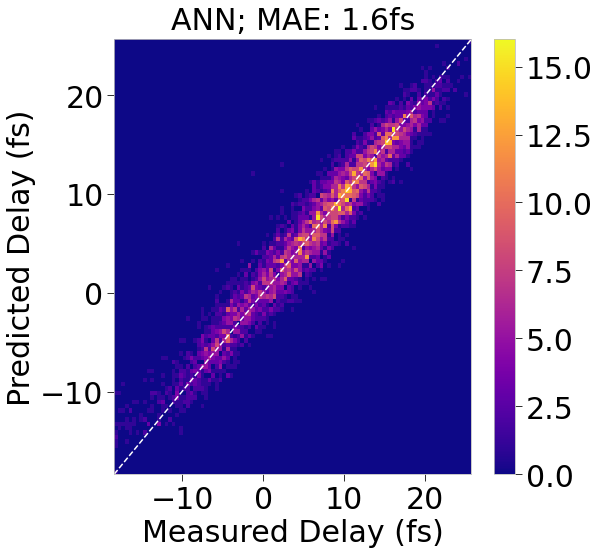

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7fb60c793070>,
 <tensorflow.python.keras.callbacks.History at 0x7fb603d918e0>)

<Figure size 432x288 with 0 Axes>

In [5]:
ann_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "doublePulse2017/results/ex_1_ann_feat/ann_pred.npz",
    "plot_fname": "doublePulse2017/results/ex_1_ann_feat/ann_hist2d"
}

ann_pipeline(data, ann_str_data)

#### Feature selection

Now let us see how the results change if we scramble individual features (called permutation feature importance).

In [4]:
ann_feat_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/ann_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_1_ann_feat/ann_low_delays_hist2d"
}


ann_feature_pipeline(data, ann_feat_str_data)

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300169     1.062586e+09        0.007866       -0.033085   
train_std      0.003873     2.396827e+07        0.084864        0.250141   
test_mean      0.300210     1.063015e+09        0.007790       -0.030254   
test_std       0.003931     2.330573e+07        0.084866        0.246038   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.324633    -0.129828     0.206475      0.068948   
train_std        6.207777     0.217714     0.224479      0.016418   
test_mean     3485.179717    -0.134894     0.211731      0.068874   
test_std         6.235614     0.218657     0.225521      0.016661   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016694     -0.263370  ...                   2.180838   
train_std       0.002907      0.028647  ...                   0.008199   
test_mean       0.016706     -0.263326  ...        

2022-01-12 12:28:49.054372: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-12 12:28:49.075220: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2095929999 Hz


24/24 - 1s - loss: 1.4062 - mae: 0.8775 - val_loss: 1.3796 - val_mae: 0.8519
Epoch 2/5000
24/24 - 0s - loss: 1.3725 - mae: 0.8458 - val_loss: 1.3524 - val_mae: 0.8268
Epoch 3/5000
24/24 - 0s - loss: 1.3470 - mae: 0.8222 - val_loss: 1.3309 - val_mae: 0.8071
Epoch 4/5000
24/24 - 0s - loss: 1.3260 - mae: 0.8029 - val_loss: 1.3125 - val_mae: 0.7904
Epoch 5/5000
24/24 - 0s - loss: 1.3079 - mae: 0.7866 - val_loss: 1.2966 - val_mae: 0.7761
Epoch 6/5000
24/24 - 0s - loss: 1.2920 - mae: 0.7723 - val_loss: 1.2825 - val_mae: 0.7637
Epoch 7/5000
24/24 - 0s - loss: 1.2777 - mae: 0.7596 - val_loss: 1.2698 - val_mae: 0.7525
Epoch 8/5000
24/24 - 0s - loss: 1.2647 - mae: 0.7482 - val_loss: 1.2582 - val_mae: 0.7425
Epoch 9/5000
24/24 - 0s - loss: 1.2526 - mae: 0.7376 - val_loss: 1.2473 - val_mae: 0.7331
Epoch 10/5000
24/24 - 0s - loss: 1.2415 - mae: 0.7280 - val_loss: 1.2373 - val_mae: 0.7245
Epoch 11/5000
24/24 - 0s - loss: 1.2310 - mae: 0.7190 - val_loss: 1.2278 - val_mae: 0.7165
Epoch 12/5000
24/24 -

Epoch 92/5000
24/24 - 0s - loss: 0.8605 - mae: 0.4345 - val_loss: 0.8741 - val_mae: 0.4485
Epoch 93/5000
24/24 - 0s - loss: 0.8580 - mae: 0.4328 - val_loss: 0.8716 - val_mae: 0.4468
Epoch 94/5000
24/24 - 0s - loss: 0.8555 - mae: 0.4311 - val_loss: 0.8692 - val_mae: 0.4452
Epoch 95/5000
24/24 - 0s - loss: 0.8530 - mae: 0.4295 - val_loss: 0.8667 - val_mae: 0.4436
Epoch 96/5000
24/24 - 0s - loss: 0.8506 - mae: 0.4279 - val_loss: 0.8643 - val_mae: 0.4420
Epoch 97/5000
24/24 - 0s - loss: 0.8482 - mae: 0.4263 - val_loss: 0.8619 - val_mae: 0.4405
Epoch 98/5000
24/24 - 0s - loss: 0.8458 - mae: 0.4247 - val_loss: 0.8595 - val_mae: 0.4389
Epoch 99/5000
24/24 - 0s - loss: 0.8434 - mae: 0.4232 - val_loss: 0.8572 - val_mae: 0.4374
Epoch 100/5000
24/24 - 0s - loss: 0.8411 - mae: 0.4217 - val_loss: 0.8549 - val_mae: 0.4359
Epoch 101/5000
24/24 - 0s - loss: 0.8388 - mae: 0.4202 - val_loss: 0.8526 - val_mae: 0.4344
Epoch 102/5000
24/24 - 0s - loss: 0.8365 - mae: 0.4187 - val_loss: 0.8503 - val_mae: 0.4

24/24 - 0s - loss: 0.7009 - mae: 0.3393 - val_loss: 0.7171 - val_mae: 0.3558
Epoch 182/5000
24/24 - 0s - loss: 0.6996 - mae: 0.3386 - val_loss: 0.7158 - val_mae: 0.3552
Epoch 183/5000
24/24 - 0s - loss: 0.6983 - mae: 0.3380 - val_loss: 0.7145 - val_mae: 0.3545
Epoch 184/5000
24/24 - 0s - loss: 0.6971 - mae: 0.3373 - val_loss: 0.7133 - val_mae: 0.3539
Epoch 185/5000
24/24 - 0s - loss: 0.6958 - mae: 0.3366 - val_loss: 0.7120 - val_mae: 0.3532
Epoch 186/5000
24/24 - 0s - loss: 0.6945 - mae: 0.3360 - val_loss: 0.7108 - val_mae: 0.3526
Epoch 187/5000
24/24 - 0s - loss: 0.6933 - mae: 0.3353 - val_loss: 0.7096 - val_mae: 0.3520
Epoch 188/5000
24/24 - 0s - loss: 0.6920 - mae: 0.3347 - val_loss: 0.7083 - val_mae: 0.3513
Epoch 189/5000
24/24 - 0s - loss: 0.6908 - mae: 0.3341 - val_loss: 0.7071 - val_mae: 0.3507
Epoch 190/5000
24/24 - 0s - loss: 0.6895 - mae: 0.3334 - val_loss: 0.7059 - val_mae: 0.3501
Epoch 191/5000
24/24 - 0s - loss: 0.6883 - mae: 0.3328 - val_loss: 0.7047 - val_mae: 0.3495
Epo

Epoch 271/5000
24/24 - 0s - loss: 0.6086 - mae: 0.2962 - val_loss: 0.6238 - val_mae: 0.3117
Epoch 272/5000
24/24 - 0s - loss: 0.6077 - mae: 0.2959 - val_loss: 0.6230 - val_mae: 0.3114
Epoch 273/5000
24/24 - 0s - loss: 0.6069 - mae: 0.2955 - val_loss: 0.6222 - val_mae: 0.3110
Epoch 274/5000
24/24 - 0s - loss: 0.6061 - mae: 0.2952 - val_loss: 0.6213 - val_mae: 0.3107
Epoch 275/5000
24/24 - 0s - loss: 0.6053 - mae: 0.2948 - val_loss: 0.6205 - val_mae: 0.3103
Epoch 276/5000
24/24 - 0s - loss: 0.6045 - mae: 0.2945 - val_loss: 0.6197 - val_mae: 0.3100
Epoch 277/5000
24/24 - 0s - loss: 0.6037 - mae: 0.2942 - val_loss: 0.6189 - val_mae: 0.3097
Epoch 278/5000
24/24 - 0s - loss: 0.6029 - mae: 0.2938 - val_loss: 0.6181 - val_mae: 0.3093
Epoch 279/5000
24/24 - 0s - loss: 0.6021 - mae: 0.2935 - val_loss: 0.6173 - val_mae: 0.3090
Epoch 280/5000
24/24 - 0s - loss: 0.6012 - mae: 0.2932 - val_loss: 0.6165 - val_mae: 0.3087
Epoch 281/5000
24/24 - 0s - loss: 0.6005 - mae: 0.2928 - val_loss: 0.6157 - val_

24/24 - 0s - loss: 0.5455 - mae: 0.2713 - val_loss: 0.5607 - val_mae: 0.2867
Epoch 361/5000
24/24 - 0s - loss: 0.5449 - mae: 0.2711 - val_loss: 0.5601 - val_mae: 0.2865
Epoch 362/5000
24/24 - 0s - loss: 0.5443 - mae: 0.2708 - val_loss: 0.5595 - val_mae: 0.2863
Epoch 363/5000
24/24 - 0s - loss: 0.5437 - mae: 0.2706 - val_loss: 0.5589 - val_mae: 0.2860
Epoch 364/5000
24/24 - 0s - loss: 0.5431 - mae: 0.2704 - val_loss: 0.5583 - val_mae: 0.2858
Epoch 365/5000
24/24 - 0s - loss: 0.5425 - mae: 0.2702 - val_loss: 0.5577 - val_mae: 0.2856
Epoch 366/5000
24/24 - 0s - loss: 0.5419 - mae: 0.2699 - val_loss: 0.5571 - val_mae: 0.2853
Epoch 367/5000
24/24 - 0s - loss: 0.5413 - mae: 0.2697 - val_loss: 0.5565 - val_mae: 0.2851
Epoch 368/5000
24/24 - 0s - loss: 0.5407 - mae: 0.2695 - val_loss: 0.5559 - val_mae: 0.2849
Epoch 369/5000
24/24 - 0s - loss: 0.5401 - mae: 0.2693 - val_loss: 0.5553 - val_mae: 0.2846
Epoch 370/5000
24/24 - 0s - loss: 0.5395 - mae: 0.2690 - val_loss: 0.5547 - val_mae: 0.2844
Epo

Epoch 450/5000
24/24 - 0s - loss: 0.4969 - mae: 0.2536 - val_loss: 0.5119 - val_mae: 0.2687
Epoch 451/5000
24/24 - 0s - loss: 0.4964 - mae: 0.2534 - val_loss: 0.5114 - val_mae: 0.2685
Epoch 452/5000
24/24 - 0s - loss: 0.4959 - mae: 0.2532 - val_loss: 0.5109 - val_mae: 0.2684
Epoch 453/5000
24/24 - 0s - loss: 0.4954 - mae: 0.2531 - val_loss: 0.5104 - val_mae: 0.2682
Epoch 454/5000
24/24 - 0s - loss: 0.4950 - mae: 0.2529 - val_loss: 0.5099 - val_mae: 0.2680
Epoch 455/5000
24/24 - 0s - loss: 0.4945 - mae: 0.2528 - val_loss: 0.5095 - val_mae: 0.2679
Epoch 456/5000
24/24 - 0s - loss: 0.4940 - mae: 0.2526 - val_loss: 0.5090 - val_mae: 0.2677
Epoch 457/5000
24/24 - 0s - loss: 0.4936 - mae: 0.2524 - val_loss: 0.5085 - val_mae: 0.2675
Epoch 458/5000
24/24 - 0s - loss: 0.4931 - mae: 0.2523 - val_loss: 0.5080 - val_mae: 0.2674
Epoch 459/5000
24/24 - 0s - loss: 0.4926 - mae: 0.2521 - val_loss: 0.5076 - val_mae: 0.2672
Epoch 460/5000
24/24 - 0s - loss: 0.4922 - mae: 0.2519 - val_loss: 0.5071 - val_

24/24 - 0s - loss: 0.4587 - mae: 0.2405 - val_loss: 0.4734 - val_mae: 0.2553
Epoch 540/5000
24/24 - 0s - loss: 0.4583 - mae: 0.2403 - val_loss: 0.4730 - val_mae: 0.2552
Epoch 541/5000
24/24 - 0s - loss: 0.4579 - mae: 0.2402 - val_loss: 0.4726 - val_mae: 0.2550
Epoch 542/5000
24/24 - 0s - loss: 0.4576 - mae: 0.2401 - val_loss: 0.4722 - val_mae: 0.2549
Epoch 543/5000
24/24 - 0s - loss: 0.4572 - mae: 0.2400 - val_loss: 0.4718 - val_mae: 0.2548
Epoch 544/5000
24/24 - 0s - loss: 0.4568 - mae: 0.2398 - val_loss: 0.4715 - val_mae: 0.2546
Epoch 545/5000
24/24 - 0s - loss: 0.4564 - mae: 0.2397 - val_loss: 0.4711 - val_mae: 0.2545
Epoch 546/5000
24/24 - 0s - loss: 0.4560 - mae: 0.2396 - val_loss: 0.4707 - val_mae: 0.2544
Epoch 547/5000
24/24 - 0s - loss: 0.4557 - mae: 0.2395 - val_loss: 0.4703 - val_mae: 0.2542
Epoch 548/5000
24/24 - 0s - loss: 0.4553 - mae: 0.2393 - val_loss: 0.4699 - val_mae: 0.2541
Epoch 549/5000
24/24 - 0s - loss: 0.4549 - mae: 0.2392 - val_loss: 0.4695 - val_mae: 0.2540
Epo

Epoch 629/5000
24/24 - 0s - loss: 0.4277 - mae: 0.2305 - val_loss: 0.4421 - val_mae: 0.2450
Epoch 630/5000
24/24 - 0s - loss: 0.4274 - mae: 0.2304 - val_loss: 0.4418 - val_mae: 0.2449
Epoch 631/5000
24/24 - 0s - loss: 0.4271 - mae: 0.2303 - val_loss: 0.4414 - val_mae: 0.2448
Epoch 632/5000
24/24 - 0s - loss: 0.4268 - mae: 0.2302 - val_loss: 0.4411 - val_mae: 0.2447
Epoch 633/5000
24/24 - 0s - loss: 0.4265 - mae: 0.2301 - val_loss: 0.4408 - val_mae: 0.2446
Epoch 634/5000
24/24 - 0s - loss: 0.4261 - mae: 0.2300 - val_loss: 0.4405 - val_mae: 0.2445
Epoch 635/5000
24/24 - 0s - loss: 0.4258 - mae: 0.2299 - val_loss: 0.4402 - val_mae: 0.2444
Epoch 636/5000
24/24 - 0s - loss: 0.4255 - mae: 0.2298 - val_loss: 0.4399 - val_mae: 0.2443
Epoch 637/5000
24/24 - 0s - loss: 0.4252 - mae: 0.2298 - val_loss: 0.4396 - val_mae: 0.2442
Epoch 638/5000
24/24 - 0s - loss: 0.4249 - mae: 0.2297 - val_loss: 0.4393 - val_mae: 0.2441
Epoch 639/5000
24/24 - 0s - loss: 0.4246 - mae: 0.2296 - val_loss: 0.4390 - val_

24/24 - 0s - loss: 0.4027 - mae: 0.2231 - val_loss: 0.4166 - val_mae: 0.2371
Epoch 719/5000
24/24 - 0s - loss: 0.4024 - mae: 0.2230 - val_loss: 0.4164 - val_mae: 0.2370
Epoch 720/5000
24/24 - 0s - loss: 0.4022 - mae: 0.2229 - val_loss: 0.4161 - val_mae: 0.2370
Epoch 721/5000
24/24 - 0s - loss: 0.4019 - mae: 0.2229 - val_loss: 0.4159 - val_mae: 0.2369
Epoch 722/5000
24/24 - 0s - loss: 0.4017 - mae: 0.2228 - val_loss: 0.4156 - val_mae: 0.2368
Epoch 723/5000
24/24 - 0s - loss: 0.4014 - mae: 0.2227 - val_loss: 0.4154 - val_mae: 0.2367
Epoch 724/5000
24/24 - 0s - loss: 0.4012 - mae: 0.2227 - val_loss: 0.4151 - val_mae: 0.2367
Epoch 725/5000
24/24 - 0s - loss: 0.4009 - mae: 0.2226 - val_loss: 0.4149 - val_mae: 0.2366
Epoch 726/5000
24/24 - 0s - loss: 0.4007 - mae: 0.2225 - val_loss: 0.4146 - val_mae: 0.2365
Epoch 727/5000
24/24 - 0s - loss: 0.4004 - mae: 0.2224 - val_loss: 0.4143 - val_mae: 0.2365
Epoch 728/5000
24/24 - 0s - loss: 0.4002 - mae: 0.2224 - val_loss: 0.4141 - val_mae: 0.2364
Epo

Epoch 808/5000
24/24 - 0s - loss: 0.3818 - mae: 0.2173 - val_loss: 0.3952 - val_mae: 0.2308
Epoch 809/5000
24/24 - 0s - loss: 0.3816 - mae: 0.2173 - val_loss: 0.3950 - val_mae: 0.2308
Epoch 810/5000
24/24 - 0s - loss: 0.3814 - mae: 0.2172 - val_loss: 0.3948 - val_mae: 0.2307
Epoch 811/5000
24/24 - 0s - loss: 0.3812 - mae: 0.2172 - val_loss: 0.3946 - val_mae: 0.2306
Epoch 812/5000
24/24 - 0s - loss: 0.3810 - mae: 0.2171 - val_loss: 0.3944 - val_mae: 0.2306
Epoch 813/5000
24/24 - 0s - loss: 0.3808 - mae: 0.2171 - val_loss: 0.3942 - val_mae: 0.2305
Epoch 814/5000
24/24 - 0s - loss: 0.3806 - mae: 0.2170 - val_loss: 0.3939 - val_mae: 0.2305
Epoch 815/5000
24/24 - 0s - loss: 0.3804 - mae: 0.2170 - val_loss: 0.3937 - val_mae: 0.2304
Epoch 816/5000
24/24 - 0s - loss: 0.3802 - mae: 0.2169 - val_loss: 0.3935 - val_mae: 0.2303
Epoch 817/5000
24/24 - 0s - loss: 0.3799 - mae: 0.2168 - val_loss: 0.3933 - val_mae: 0.2303
Epoch 818/5000
24/24 - 0s - loss: 0.3797 - mae: 0.2168 - val_loss: 0.3931 - val_

24/24 - 0s - loss: 0.3645 - mae: 0.2129 - val_loss: 0.3774 - val_mae: 0.2258
Epoch 898/5000
24/24 - 0s - loss: 0.3644 - mae: 0.2128 - val_loss: 0.3772 - val_mae: 0.2257
Epoch 899/5000
24/24 - 0s - loss: 0.3642 - mae: 0.2128 - val_loss: 0.3770 - val_mae: 0.2257
Epoch 900/5000
24/24 - 0s - loss: 0.3640 - mae: 0.2127 - val_loss: 0.3768 - val_mae: 0.2256
Epoch 901/5000
24/24 - 0s - loss: 0.3638 - mae: 0.2127 - val_loss: 0.3767 - val_mae: 0.2256
Epoch 902/5000
24/24 - 0s - loss: 0.3636 - mae: 0.2126 - val_loss: 0.3765 - val_mae: 0.2255
Epoch 903/5000
24/24 - 0s - loss: 0.3635 - mae: 0.2126 - val_loss: 0.3763 - val_mae: 0.2255
Epoch 904/5000
24/24 - 0s - loss: 0.3633 - mae: 0.2126 - val_loss: 0.3761 - val_mae: 0.2254
Epoch 905/5000
24/24 - 0s - loss: 0.3631 - mae: 0.2125 - val_loss: 0.3759 - val_mae: 0.2254
Epoch 906/5000
24/24 - 0s - loss: 0.3629 - mae: 0.2125 - val_loss: 0.3757 - val_mae: 0.2254
Epoch 907/5000
24/24 - 0s - loss: 0.3628 - mae: 0.2124 - val_loss: 0.3756 - val_mae: 0.2253
Epo

Epoch 987/5000
24/24 - 0s - loss: 0.3497 - mae: 0.2093 - val_loss: 0.3621 - val_mae: 0.2218
Epoch 988/5000
24/24 - 0s - loss: 0.3495 - mae: 0.2092 - val_loss: 0.3620 - val_mae: 0.2218
Epoch 989/5000
24/24 - 0s - loss: 0.3494 - mae: 0.2092 - val_loss: 0.3618 - val_mae: 0.2217
Epoch 990/5000
24/24 - 0s - loss: 0.3492 - mae: 0.2092 - val_loss: 0.3617 - val_mae: 0.2217
Epoch 991/5000
24/24 - 0s - loss: 0.3491 - mae: 0.2091 - val_loss: 0.3615 - val_mae: 0.2216
Epoch 992/5000
24/24 - 0s - loss: 0.3489 - mae: 0.2091 - val_loss: 0.3614 - val_mae: 0.2216
Epoch 993/5000
24/24 - 0s - loss: 0.3488 - mae: 0.2091 - val_loss: 0.3612 - val_mae: 0.2216
Epoch 994/5000
24/24 - 0s - loss: 0.3486 - mae: 0.2090 - val_loss: 0.3611 - val_mae: 0.2215
Epoch 995/5000
24/24 - 0s - loss: 0.3485 - mae: 0.2090 - val_loss: 0.3609 - val_mae: 0.2215
Epoch 996/5000
24/24 - 0s - loss: 0.3483 - mae: 0.2090 - val_loss: 0.3608 - val_mae: 0.2215
Epoch 997/5000
24/24 - 0s - loss: 0.3482 - mae: 0.2089 - val_loss: 0.3606 - val_

Epoch 1076/5000
24/24 - 0s - loss: 0.3371 - mae: 0.2064 - val_loss: 0.3493 - val_mae: 0.2187
Epoch 1077/5000
24/24 - 0s - loss: 0.3370 - mae: 0.2064 - val_loss: 0.3492 - val_mae: 0.2187
Epoch 1078/5000
24/24 - 0s - loss: 0.3368 - mae: 0.2064 - val_loss: 0.3491 - val_mae: 0.2187
Epoch 1079/5000
24/24 - 0s - loss: 0.3367 - mae: 0.2063 - val_loss: 0.3489 - val_mae: 0.2186
Epoch 1080/5000
24/24 - 0s - loss: 0.3366 - mae: 0.2063 - val_loss: 0.3488 - val_mae: 0.2186
Epoch 1081/5000
24/24 - 0s - loss: 0.3364 - mae: 0.2063 - val_loss: 0.3487 - val_mae: 0.2186
Epoch 1082/5000
24/24 - 0s - loss: 0.3363 - mae: 0.2062 - val_loss: 0.3486 - val_mae: 0.2185
Epoch 1083/5000
24/24 - 0s - loss: 0.3362 - mae: 0.2062 - val_loss: 0.3484 - val_mae: 0.2185
Epoch 1084/5000
24/24 - 0s - loss: 0.3360 - mae: 0.2062 - val_loss: 0.3483 - val_mae: 0.2185
Epoch 1085/5000
24/24 - 0s - loss: 0.3359 - mae: 0.2062 - val_loss: 0.3482 - val_mae: 0.2185
Epoch 1086/5000
24/24 - 0s - loss: 0.3358 - mae: 0.2061 - val_loss: 0.

24/24 - 0s - loss: 0.3262 - mae: 0.2041 - val_loss: 0.3383 - val_mae: 0.2162
Epoch 1165/5000
24/24 - 0s - loss: 0.3261 - mae: 0.2040 - val_loss: 0.3382 - val_mae: 0.2162
Epoch 1166/5000
24/24 - 0s - loss: 0.3260 - mae: 0.2040 - val_loss: 0.3381 - val_mae: 0.2161
Epoch 1167/5000
24/24 - 0s - loss: 0.3259 - mae: 0.2040 - val_loss: 0.3380 - val_mae: 0.2161
Epoch 1168/5000
24/24 - 0s - loss: 0.3258 - mae: 0.2040 - val_loss: 0.3378 - val_mae: 0.2161
Epoch 1169/5000
24/24 - 0s - loss: 0.3257 - mae: 0.2039 - val_loss: 0.3377 - val_mae: 0.2160
Epoch 1170/5000
24/24 - 0s - loss: 0.3255 - mae: 0.2039 - val_loss: 0.3376 - val_mae: 0.2160
Epoch 1171/5000
24/24 - 0s - loss: 0.3254 - mae: 0.2039 - val_loss: 0.3375 - val_mae: 0.2160
Epoch 1172/5000
24/24 - 0s - loss: 0.3253 - mae: 0.2038 - val_loss: 0.3374 - val_mae: 0.2160
Epoch 1173/5000
24/24 - 0s - loss: 0.3252 - mae: 0.2038 - val_loss: 0.3373 - val_mae: 0.2159
Epoch 1174/5000
24/24 - 0s - loss: 0.3251 - mae: 0.2038 - val_loss: 0.3371 - val_mae: 

Epoch 1253/5000
24/24 - 0s - loss: 0.3166 - mae: 0.2020 - val_loss: 0.3285 - val_mae: 0.2140
Epoch 1254/5000
24/24 - 0s - loss: 0.3165 - mae: 0.2020 - val_loss: 0.3284 - val_mae: 0.2140
Epoch 1255/5000
24/24 - 0s - loss: 0.3164 - mae: 0.2020 - val_loss: 0.3283 - val_mae: 0.2139
Epoch 1256/5000
24/24 - 0s - loss: 0.3163 - mae: 0.2020 - val_loss: 0.3282 - val_mae: 0.2139
Epoch 1257/5000
24/24 - 0s - loss: 0.3162 - mae: 0.2019 - val_loss: 0.3281 - val_mae: 0.2139
Epoch 1258/5000
24/24 - 0s - loss: 0.3161 - mae: 0.2019 - val_loss: 0.3280 - val_mae: 0.2139
Epoch 1259/5000
24/24 - 0s - loss: 0.3160 - mae: 0.2019 - val_loss: 0.3279 - val_mae: 0.2138
Epoch 1260/5000
24/24 - 0s - loss: 0.3159 - mae: 0.2019 - val_loss: 0.3278 - val_mae: 0.2138
Epoch 1261/5000
24/24 - 0s - loss: 0.3158 - mae: 0.2019 - val_loss: 0.3277 - val_mae: 0.2138
Epoch 1262/5000
24/24 - 0s - loss: 0.3157 - mae: 0.2018 - val_loss: 0.3276 - val_mae: 0.2138
Epoch 1263/5000
24/24 - 0s - loss: 0.3156 - mae: 0.2018 - val_loss: 0.

24/24 - 0s - loss: 0.3082 - mae: 0.2003 - val_loss: 0.3200 - val_mae: 0.2121
Epoch 1342/5000
24/24 - 0s - loss: 0.3081 - mae: 0.2003 - val_loss: 0.3199 - val_mae: 0.2121
Epoch 1343/5000
24/24 - 0s - loss: 0.3080 - mae: 0.2003 - val_loss: 0.3198 - val_mae: 0.2121
Epoch 1344/5000
24/24 - 0s - loss: 0.3079 - mae: 0.2003 - val_loss: 0.3197 - val_mae: 0.2121
Epoch 1345/5000
24/24 - 0s - loss: 0.3078 - mae: 0.2002 - val_loss: 0.3196 - val_mae: 0.2121
Epoch 1346/5000
24/24 - 0s - loss: 0.3077 - mae: 0.2002 - val_loss: 0.3195 - val_mae: 0.2120
Epoch 1347/5000
24/24 - 0s - loss: 0.3077 - mae: 0.2002 - val_loss: 0.3194 - val_mae: 0.2120
Epoch 1348/5000
24/24 - 0s - loss: 0.3076 - mae: 0.2002 - val_loss: 0.3193 - val_mae: 0.2120
Epoch 1349/5000
24/24 - 0s - loss: 0.3075 - mae: 0.2002 - val_loss: 0.3193 - val_mae: 0.2120
Epoch 1350/5000
24/24 - 0s - loss: 0.3074 - mae: 0.2002 - val_loss: 0.3192 - val_mae: 0.2120
Epoch 1351/5000
24/24 - 0s - loss: 0.3073 - mae: 0.2001 - val_loss: 0.3191 - val_mae: 

Epoch 1430/5000
24/24 - 0s - loss: 0.3007 - mae: 0.1988 - val_loss: 0.3124 - val_mae: 0.2106
Epoch 1431/5000
24/24 - 0s - loss: 0.3006 - mae: 0.1988 - val_loss: 0.3123 - val_mae: 0.2106
Epoch 1432/5000
24/24 - 0s - loss: 0.3005 - mae: 0.1988 - val_loss: 0.3122 - val_mae: 0.2106
Epoch 1433/5000
24/24 - 0s - loss: 0.3004 - mae: 0.1988 - val_loss: 0.3122 - val_mae: 0.2106
Epoch 1434/5000
24/24 - 0s - loss: 0.3004 - mae: 0.1988 - val_loss: 0.3121 - val_mae: 0.2106
Epoch 1435/5000
24/24 - 0s - loss: 0.3003 - mae: 0.1988 - val_loss: 0.3120 - val_mae: 0.2105
Epoch 1436/5000
24/24 - 0s - loss: 0.3002 - mae: 0.1987 - val_loss: 0.3119 - val_mae: 0.2105
Epoch 1437/5000
24/24 - 0s - loss: 0.3001 - mae: 0.1987 - val_loss: 0.3119 - val_mae: 0.2105
Epoch 1438/5000
24/24 - 0s - loss: 0.3000 - mae: 0.1987 - val_loss: 0.3118 - val_mae: 0.2105
Epoch 1439/5000
24/24 - 0s - loss: 0.3000 - mae: 0.1987 - val_loss: 0.3117 - val_mae: 0.2105
Epoch 1440/5000
24/24 - 0s - loss: 0.2999 - mae: 0.1987 - val_loss: 0.

24/24 - 0s - loss: 0.2940 - mae: 0.1975 - val_loss: 0.3057 - val_mae: 0.2092
Epoch 1519/5000
24/24 - 0s - loss: 0.2940 - mae: 0.1975 - val_loss: 0.3056 - val_mae: 0.2092
Epoch 1520/5000
24/24 - 0s - loss: 0.2939 - mae: 0.1975 - val_loss: 0.3055 - val_mae: 0.2092
Epoch 1521/5000
24/24 - 0s - loss: 0.2938 - mae: 0.1975 - val_loss: 0.3055 - val_mae: 0.2092
Epoch 1522/5000
24/24 - 0s - loss: 0.2938 - mae: 0.1975 - val_loss: 0.3054 - val_mae: 0.2092
Epoch 1523/5000
24/24 - 0s - loss: 0.2937 - mae: 0.1975 - val_loss: 0.3053 - val_mae: 0.2092
Epoch 1524/5000
24/24 - 0s - loss: 0.2936 - mae: 0.1975 - val_loss: 0.3053 - val_mae: 0.2091
Epoch 1525/5000
24/24 - 0s - loss: 0.2935 - mae: 0.1974 - val_loss: 0.3052 - val_mae: 0.2091
Epoch 1526/5000
24/24 - 0s - loss: 0.2935 - mae: 0.1974 - val_loss: 0.3051 - val_mae: 0.2091
Epoch 1527/5000
24/24 - 0s - loss: 0.2934 - mae: 0.1974 - val_loss: 0.3050 - val_mae: 0.2091
Epoch 1528/5000
24/24 - 0s - loss: 0.2933 - mae: 0.1974 - val_loss: 0.3050 - val_mae: 

Epoch 1607/5000
24/24 - 0s - loss: 0.2880 - mae: 0.1964 - val_loss: 0.2996 - val_mae: 0.2080
Epoch 1608/5000
24/24 - 0s - loss: 0.2879 - mae: 0.1964 - val_loss: 0.2995 - val_mae: 0.2080
Epoch 1609/5000
24/24 - 0s - loss: 0.2879 - mae: 0.1963 - val_loss: 0.2994 - val_mae: 0.2080
Epoch 1610/5000
24/24 - 0s - loss: 0.2878 - mae: 0.1963 - val_loss: 0.2994 - val_mae: 0.2080
Epoch 1611/5000
24/24 - 0s - loss: 0.2877 - mae: 0.1963 - val_loss: 0.2993 - val_mae: 0.2079
Epoch 1612/5000
24/24 - 0s - loss: 0.2877 - mae: 0.1963 - val_loss: 0.2993 - val_mae: 0.2079
Epoch 1613/5000
24/24 - 0s - loss: 0.2876 - mae: 0.1963 - val_loss: 0.2992 - val_mae: 0.2079
Epoch 1614/5000
24/24 - 0s - loss: 0.2875 - mae: 0.1963 - val_loss: 0.2991 - val_mae: 0.2079
Epoch 1615/5000
24/24 - 0s - loss: 0.2875 - mae: 0.1963 - val_loss: 0.2991 - val_mae: 0.2079
Epoch 1616/5000
24/24 - 0s - loss: 0.2874 - mae: 0.1963 - val_loss: 0.2990 - val_mae: 0.2079
Epoch 1617/5000
24/24 - 0s - loss: 0.2873 - mae: 0.1962 - val_loss: 0.

24/24 - 0s - loss: 0.2826 - mae: 0.1954 - val_loss: 0.2942 - val_mae: 0.2070
Epoch 1696/5000
24/24 - 0s - loss: 0.2825 - mae: 0.1954 - val_loss: 0.2941 - val_mae: 0.2070
Epoch 1697/5000
24/24 - 0s - loss: 0.2825 - mae: 0.1953 - val_loss: 0.2941 - val_mae: 0.2070
Epoch 1698/5000
24/24 - 0s - loss: 0.2824 - mae: 0.1953 - val_loss: 0.2940 - val_mae: 0.2070
Epoch 1699/5000
24/24 - 0s - loss: 0.2824 - mae: 0.1953 - val_loss: 0.2940 - val_mae: 0.2069
Epoch 1700/5000
24/24 - 0s - loss: 0.2823 - mae: 0.1953 - val_loss: 0.2939 - val_mae: 0.2069
Epoch 1701/5000
24/24 - 0s - loss: 0.2823 - mae: 0.1953 - val_loss: 0.2938 - val_mae: 0.2069
Epoch 1702/5000
24/24 - 0s - loss: 0.2822 - mae: 0.1953 - val_loss: 0.2938 - val_mae: 0.2069
Epoch 1703/5000
24/24 - 0s - loss: 0.2821 - mae: 0.1953 - val_loss: 0.2937 - val_mae: 0.2069
Epoch 1704/5000
24/24 - 0s - loss: 0.2821 - mae: 0.1953 - val_loss: 0.2937 - val_mae: 0.2069
Epoch 1705/5000
24/24 - 0s - loss: 0.2820 - mae: 0.1953 - val_loss: 0.2936 - val_mae: 

Epoch 1784/5000
24/24 - 0s - loss: 0.2777 - mae: 0.1945 - val_loss: 0.2892 - val_mae: 0.2060
Epoch 1785/5000
24/24 - 0s - loss: 0.2776 - mae: 0.1944 - val_loss: 0.2891 - val_mae: 0.2060
Epoch 1786/5000
24/24 - 0s - loss: 0.2776 - mae: 0.1944 - val_loss: 0.2891 - val_mae: 0.2060
Epoch 1787/5000
24/24 - 0s - loss: 0.2775 - mae: 0.1944 - val_loss: 0.2890 - val_mae: 0.2060
Epoch 1788/5000
24/24 - 0s - loss: 0.2775 - mae: 0.1944 - val_loss: 0.2890 - val_mae: 0.2059
Epoch 1789/5000
24/24 - 0s - loss: 0.2774 - mae: 0.1944 - val_loss: 0.2889 - val_mae: 0.2059
Epoch 1790/5000
24/24 - 0s - loss: 0.2774 - mae: 0.1944 - val_loss: 0.2889 - val_mae: 0.2059
Epoch 1791/5000
24/24 - 0s - loss: 0.2773 - mae: 0.1944 - val_loss: 0.2888 - val_mae: 0.2059
Epoch 1792/5000
24/24 - 0s - loss: 0.2773 - mae: 0.1944 - val_loss: 0.2887 - val_mae: 0.2059
Epoch 1793/5000
24/24 - 0s - loss: 0.2772 - mae: 0.1944 - val_loss: 0.2887 - val_mae: 0.2059
Epoch 1794/5000
24/24 - 0s - loss: 0.2772 - mae: 0.1944 - val_loss: 0.

24/24 - 0s - loss: 0.2732 - mae: 0.1936 - val_loss: 0.2846 - val_mae: 0.2050
Epoch 1873/5000
24/24 - 0s - loss: 0.2732 - mae: 0.1936 - val_loss: 0.2846 - val_mae: 0.2050
Epoch 1874/5000
24/24 - 0s - loss: 0.2731 - mae: 0.1936 - val_loss: 0.2845 - val_mae: 0.2050
Epoch 1875/5000
24/24 - 0s - loss: 0.2731 - mae: 0.1936 - val_loss: 0.2845 - val_mae: 0.2050
Epoch 1876/5000
24/24 - 0s - loss: 0.2730 - mae: 0.1936 - val_loss: 0.2844 - val_mae: 0.2050
Epoch 1877/5000
24/24 - 0s - loss: 0.2730 - mae: 0.1936 - val_loss: 0.2844 - val_mae: 0.2050
Epoch 1878/5000
24/24 - 0s - loss: 0.2729 - mae: 0.1936 - val_loss: 0.2843 - val_mae: 0.2050
Epoch 1879/5000
24/24 - 0s - loss: 0.2729 - mae: 0.1936 - val_loss: 0.2843 - val_mae: 0.2050
Epoch 1880/5000
24/24 - 0s - loss: 0.2728 - mae: 0.1936 - val_loss: 0.2842 - val_mae: 0.2050
Epoch 1881/5000
24/24 - 0s - loss: 0.2728 - mae: 0.1936 - val_loss: 0.2842 - val_mae: 0.2050
Epoch 1882/5000
24/24 - 0s - loss: 0.2727 - mae: 0.1935 - val_loss: 0.2841 - val_mae: 

Epoch 1961/5000
24/24 - 0s - loss: 0.2691 - mae: 0.1929 - val_loss: 0.2805 - val_mae: 0.2043
Epoch 1962/5000
24/24 - 0s - loss: 0.2691 - mae: 0.1929 - val_loss: 0.2805 - val_mae: 0.2043
Epoch 1963/5000
24/24 - 0s - loss: 0.2690 - mae: 0.1929 - val_loss: 0.2805 - val_mae: 0.2043
Epoch 1964/5000
24/24 - 0s - loss: 0.2690 - mae: 0.1929 - val_loss: 0.2804 - val_mae: 0.2043
Epoch 1965/5000
24/24 - 0s - loss: 0.2690 - mae: 0.1929 - val_loss: 0.2804 - val_mae: 0.2043
Epoch 1966/5000
24/24 - 0s - loss: 0.2689 - mae: 0.1928 - val_loss: 0.2803 - val_mae: 0.2043
Epoch 1967/5000
24/24 - 0s - loss: 0.2689 - mae: 0.1928 - val_loss: 0.2803 - val_mae: 0.2043
Epoch 1968/5000
24/24 - 0s - loss: 0.2688 - mae: 0.1928 - val_loss: 0.2802 - val_mae: 0.2043
Epoch 1969/5000
24/24 - 0s - loss: 0.2688 - mae: 0.1928 - val_loss: 0.2802 - val_mae: 0.2043
Epoch 1970/5000
24/24 - 0s - loss: 0.2687 - mae: 0.1928 - val_loss: 0.2802 - val_mae: 0.2043
Epoch 1971/5000
24/24 - 0s - loss: 0.2687 - mae: 0.1928 - val_loss: 0.

24/24 - 0s - loss: 0.2654 - mae: 0.1922 - val_loss: 0.2768 - val_mae: 0.2037
Epoch 2050/5000
24/24 - 0s - loss: 0.2654 - mae: 0.1922 - val_loss: 0.2768 - val_mae: 0.2036
Epoch 2051/5000
24/24 - 0s - loss: 0.2653 - mae: 0.1922 - val_loss: 0.2767 - val_mae: 0.2036
Epoch 2052/5000
24/24 - 0s - loss: 0.2653 - mae: 0.1922 - val_loss: 0.2767 - val_mae: 0.2036
Epoch 2053/5000
24/24 - 0s - loss: 0.2653 - mae: 0.1922 - val_loss: 0.2767 - val_mae: 0.2036
Epoch 2054/5000
24/24 - 0s - loss: 0.2652 - mae: 0.1922 - val_loss: 0.2766 - val_mae: 0.2036
Epoch 2055/5000
24/24 - 0s - loss: 0.2652 - mae: 0.1922 - val_loss: 0.2766 - val_mae: 0.2036
Epoch 2056/5000
24/24 - 0s - loss: 0.2651 - mae: 0.1921 - val_loss: 0.2765 - val_mae: 0.2036
Epoch 2057/5000
24/24 - 0s - loss: 0.2651 - mae: 0.1921 - val_loss: 0.2765 - val_mae: 0.2036
Epoch 2058/5000
24/24 - 0s - loss: 0.2651 - mae: 0.1921 - val_loss: 0.2765 - val_mae: 0.2036
Epoch 2059/5000
24/24 - 0s - loss: 0.2650 - mae: 0.1921 - val_loss: 0.2764 - val_mae: 

Epoch 2138/5000
24/24 - 0s - loss: 0.2620 - mae: 0.1915 - val_loss: 0.2733 - val_mae: 0.2029
Epoch 2139/5000
24/24 - 0s - loss: 0.2619 - mae: 0.1915 - val_loss: 0.2733 - val_mae: 0.2029
Epoch 2140/5000
24/24 - 0s - loss: 0.2619 - mae: 0.1915 - val_loss: 0.2733 - val_mae: 0.2029
Epoch 2141/5000
24/24 - 0s - loss: 0.2618 - mae: 0.1915 - val_loss: 0.2732 - val_mae: 0.2029
Epoch 2142/5000
24/24 - 0s - loss: 0.2618 - mae: 0.1915 - val_loss: 0.2732 - val_mae: 0.2029
Epoch 2143/5000
24/24 - 0s - loss: 0.2618 - mae: 0.1915 - val_loss: 0.2732 - val_mae: 0.2029
Epoch 2144/5000
24/24 - 0s - loss: 0.2617 - mae: 0.1915 - val_loss: 0.2731 - val_mae: 0.2029
Epoch 2145/5000
24/24 - 0s - loss: 0.2617 - mae: 0.1915 - val_loss: 0.2731 - val_mae: 0.2029
Epoch 2146/5000
24/24 - 0s - loss: 0.2617 - mae: 0.1915 - val_loss: 0.2730 - val_mae: 0.2029
Epoch 2147/5000
24/24 - 0s - loss: 0.2616 - mae: 0.1915 - val_loss: 0.2730 - val_mae: 0.2029
Epoch 2148/5000
24/24 - 0s - loss: 0.2616 - mae: 0.1915 - val_loss: 0.

24/24 - 0s - loss: 0.2588 - mae: 0.1910 - val_loss: 0.2702 - val_mae: 0.2024
Epoch 2227/5000
24/24 - 0s - loss: 0.2588 - mae: 0.1910 - val_loss: 0.2702 - val_mae: 0.2024
Epoch 2228/5000
24/24 - 0s - loss: 0.2587 - mae: 0.1909 - val_loss: 0.2702 - val_mae: 0.2024
Epoch 2229/5000
24/24 - 0s - loss: 0.2587 - mae: 0.1909 - val_loss: 0.2702 - val_mae: 0.2024
Epoch 2230/5000
24/24 - 0s - loss: 0.2587 - mae: 0.1909 - val_loss: 0.2701 - val_mae: 0.2024
Epoch 2231/5000
24/24 - 0s - loss: 0.2586 - mae: 0.1909 - val_loss: 0.2701 - val_mae: 0.2024
Epoch 2232/5000
24/24 - 0s - loss: 0.2586 - mae: 0.1909 - val_loss: 0.2701 - val_mae: 0.2024
Epoch 2233/5000
24/24 - 0s - loss: 0.2586 - mae: 0.1909 - val_loss: 0.2700 - val_mae: 0.2024
Epoch 2234/5000
24/24 - 0s - loss: 0.2585 - mae: 0.1909 - val_loss: 0.2700 - val_mae: 0.2024
Epoch 2235/5000
24/24 - 0s - loss: 0.2585 - mae: 0.1909 - val_loss: 0.2700 - val_mae: 0.2024
Epoch 2236/5000
24/24 - 0s - loss: 0.2585 - mae: 0.1909 - val_loss: 0.2699 - val_mae: 

Epoch 2315/5000
24/24 - 0s - loss: 0.2559 - mae: 0.1904 - val_loss: 0.2674 - val_mae: 0.2020
Epoch 2316/5000
24/24 - 0s - loss: 0.2558 - mae: 0.1904 - val_loss: 0.2674 - val_mae: 0.2020
Epoch 2317/5000
24/24 - 0s - loss: 0.2558 - mae: 0.1904 - val_loss: 0.2673 - val_mae: 0.2020
Epoch 2318/5000
24/24 - 0s - loss: 0.2558 - mae: 0.1904 - val_loss: 0.2673 - val_mae: 0.2020
Epoch 2319/5000
24/24 - 0s - loss: 0.2557 - mae: 0.1904 - val_loss: 0.2673 - val_mae: 0.2019
Epoch 2320/5000
24/24 - 0s - loss: 0.2557 - mae: 0.1904 - val_loss: 0.2673 - val_mae: 0.2019
Epoch 2321/5000
24/24 - 0s - loss: 0.2557 - mae: 0.1904 - val_loss: 0.2672 - val_mae: 0.2019
Epoch 2322/5000
24/24 - 0s - loss: 0.2556 - mae: 0.1904 - val_loss: 0.2672 - val_mae: 0.2019
Epoch 2323/5000
24/24 - 0s - loss: 0.2556 - mae: 0.1904 - val_loss: 0.2672 - val_mae: 0.2019
Epoch 2324/5000
24/24 - 0s - loss: 0.2556 - mae: 0.1904 - val_loss: 0.2671 - val_mae: 0.2019
Epoch 2325/5000
24/24 - 0s - loss: 0.2556 - mae: 0.1904 - val_loss: 0.

24/24 - 0s - loss: 0.2532 - mae: 0.1899 - val_loss: 0.2647 - val_mae: 0.2015
Epoch 2404/5000
24/24 - 0s - loss: 0.2532 - mae: 0.1899 - val_loss: 0.2647 - val_mae: 0.2015
Epoch 2405/5000
24/24 - 0s - loss: 0.2531 - mae: 0.1899 - val_loss: 0.2647 - val_mae: 0.2015
Epoch 2406/5000
24/24 - 0s - loss: 0.2531 - mae: 0.1899 - val_loss: 0.2647 - val_mae: 0.2015
Epoch 2407/5000
24/24 - 0s - loss: 0.2531 - mae: 0.1899 - val_loss: 0.2646 - val_mae: 0.2015
Epoch 2408/5000
24/24 - 0s - loss: 0.2530 - mae: 0.1899 - val_loss: 0.2646 - val_mae: 0.2015
Epoch 2409/5000
24/24 - 0s - loss: 0.2530 - mae: 0.1899 - val_loss: 0.2646 - val_mae: 0.2015
Epoch 2410/5000
24/24 - 0s - loss: 0.2530 - mae: 0.1899 - val_loss: 0.2645 - val_mae: 0.2014
Epoch 2411/5000
24/24 - 0s - loss: 0.2529 - mae: 0.1899 - val_loss: 0.2645 - val_mae: 0.2015
Epoch 2412/5000
24/24 - 0s - loss: 0.2529 - mae: 0.1899 - val_loss: 0.2645 - val_mae: 0.2014
Epoch 2413/5000
24/24 - 0s - loss: 0.2529 - mae: 0.1899 - val_loss: 0.2644 - val_mae: 

Epoch 2492/5000
24/24 - 0s - loss: 0.2507 - mae: 0.1894 - val_loss: 0.2622 - val_mae: 0.2010
Epoch 2493/5000
24/24 - 0s - loss: 0.2506 - mae: 0.1894 - val_loss: 0.2622 - val_mae: 0.2010
Epoch 2494/5000
24/24 - 0s - loss: 0.2506 - mae: 0.1894 - val_loss: 0.2622 - val_mae: 0.2010
Epoch 2495/5000
24/24 - 0s - loss: 0.2506 - mae: 0.1894 - val_loss: 0.2622 - val_mae: 0.2010
Epoch 2496/5000
24/24 - 0s - loss: 0.2506 - mae: 0.1894 - val_loss: 0.2621 - val_mae: 0.2010
Epoch 2497/5000
24/24 - 0s - loss: 0.2505 - mae: 0.1894 - val_loss: 0.2621 - val_mae: 0.2010
Epoch 2498/5000
24/24 - 0s - loss: 0.2505 - mae: 0.1894 - val_loss: 0.2621 - val_mae: 0.2010
Epoch 2499/5000
24/24 - 0s - loss: 0.2505 - mae: 0.1894 - val_loss: 0.2620 - val_mae: 0.2010
Epoch 2500/5000
24/24 - 0s - loss: 0.2505 - mae: 0.1894 - val_loss: 0.2620 - val_mae: 0.2010
Epoch 2501/5000
24/24 - 0s - loss: 0.2504 - mae: 0.1894 - val_loss: 0.2620 - val_mae: 0.2010
Epoch 2502/5000
24/24 - 0s - loss: 0.2504 - mae: 0.1894 - val_loss: 0.

24/24 - 0s - loss: 0.2484 - mae: 0.1890 - val_loss: 0.2599 - val_mae: 0.2006
Epoch 2581/5000
24/24 - 0s - loss: 0.2483 - mae: 0.1890 - val_loss: 0.2599 - val_mae: 0.2006
Epoch 2582/5000
24/24 - 0s - loss: 0.2483 - mae: 0.1890 - val_loss: 0.2599 - val_mae: 0.2006
Epoch 2583/5000
24/24 - 0s - loss: 0.2483 - mae: 0.1890 - val_loss: 0.2599 - val_mae: 0.2006
Epoch 2584/5000
24/24 - 0s - loss: 0.2483 - mae: 0.1890 - val_loss: 0.2599 - val_mae: 0.2006
Epoch 2585/5000
24/24 - 0s - loss: 0.2482 - mae: 0.1890 - val_loss: 0.2598 - val_mae: 0.2006
Epoch 2586/5000
24/24 - 0s - loss: 0.2482 - mae: 0.1890 - val_loss: 0.2598 - val_mae: 0.2006
Epoch 2587/5000
24/24 - 0s - loss: 0.2482 - mae: 0.1890 - val_loss: 0.2598 - val_mae: 0.2006
Epoch 2588/5000
24/24 - 0s - loss: 0.2482 - mae: 0.1890 - val_loss: 0.2598 - val_mae: 0.2006
Epoch 2589/5000
24/24 - 0s - loss: 0.2481 - mae: 0.1890 - val_loss: 0.2597 - val_mae: 0.2006
Epoch 2590/5000
24/24 - 0s - loss: 0.2481 - mae: 0.1890 - val_loss: 0.2597 - val_mae: 

Epoch 2669/5000
24/24 - 0s - loss: 0.2462 - mae: 0.1886 - val_loss: 0.2578 - val_mae: 0.2002
Epoch 2670/5000
24/24 - 0s - loss: 0.2462 - mae: 0.1886 - val_loss: 0.2578 - val_mae: 0.2002
Epoch 2671/5000
24/24 - 0s - loss: 0.2462 - mae: 0.1886 - val_loss: 0.2578 - val_mae: 0.2002
Epoch 2672/5000
24/24 - 0s - loss: 0.2461 - mae: 0.1886 - val_loss: 0.2577 - val_mae: 0.2002
Epoch 2673/5000
24/24 - 0s - loss: 0.2461 - mae: 0.1886 - val_loss: 0.2577 - val_mae: 0.2002
Epoch 2674/5000
24/24 - 0s - loss: 0.2461 - mae: 0.1886 - val_loss: 0.2577 - val_mae: 0.2002
Epoch 2675/5000
24/24 - 0s - loss: 0.2461 - mae: 0.1886 - val_loss: 0.2577 - val_mae: 0.2002
Epoch 2676/5000
24/24 - 0s - loss: 0.2460 - mae: 0.1886 - val_loss: 0.2576 - val_mae: 0.2002
Epoch 2677/5000
24/24 - 0s - loss: 0.2460 - mae: 0.1886 - val_loss: 0.2576 - val_mae: 0.2002
Epoch 2678/5000
24/24 - 0s - loss: 0.2460 - mae: 0.1886 - val_loss: 0.2576 - val_mae: 0.2002
Epoch 2679/5000
24/24 - 0s - loss: 0.2460 - mae: 0.1886 - val_loss: 0.

24/24 - 0s - loss: 0.2442 - mae: 0.1882 - val_loss: 0.2558 - val_mae: 0.1998
Epoch 2758/5000
24/24 - 0s - loss: 0.2442 - mae: 0.1882 - val_loss: 0.2558 - val_mae: 0.1998
Epoch 2759/5000
24/24 - 0s - loss: 0.2442 - mae: 0.1882 - val_loss: 0.2558 - val_mae: 0.1998
Epoch 2760/5000
24/24 - 0s - loss: 0.2442 - mae: 0.1882 - val_loss: 0.2557 - val_mae: 0.1998
Epoch 2761/5000
24/24 - 0s - loss: 0.2441 - mae: 0.1882 - val_loss: 0.2557 - val_mae: 0.1998
Epoch 2762/5000
24/24 - 0s - loss: 0.2441 - mae: 0.1882 - val_loss: 0.2557 - val_mae: 0.1998
Epoch 2763/5000
24/24 - 0s - loss: 0.2441 - mae: 0.1882 - val_loss: 0.2557 - val_mae: 0.1998
Epoch 2764/5000
24/24 - 0s - loss: 0.2441 - mae: 0.1882 - val_loss: 0.2557 - val_mae: 0.1998
Epoch 2765/5000
24/24 - 0s - loss: 0.2441 - mae: 0.1882 - val_loss: 0.2556 - val_mae: 0.1998
Epoch 2766/5000
24/24 - 0s - loss: 0.2440 - mae: 0.1882 - val_loss: 0.2556 - val_mae: 0.1998
Epoch 2767/5000
24/24 - 0s - loss: 0.2440 - mae: 0.1882 - val_loss: 0.2556 - val_mae: 

Epoch 2846/5000
24/24 - 0s - loss: 0.2423 - mae: 0.1879 - val_loss: 0.2539 - val_mae: 0.1994
Epoch 2847/5000
24/24 - 0s - loss: 0.2423 - mae: 0.1878 - val_loss: 0.2539 - val_mae: 0.1994
Epoch 2848/5000
24/24 - 0s - loss: 0.2423 - mae: 0.1878 - val_loss: 0.2539 - val_mae: 0.1994
Epoch 2849/5000
24/24 - 0s - loss: 0.2423 - mae: 0.1878 - val_loss: 0.2538 - val_mae: 0.1994
Epoch 2850/5000
24/24 - 0s - loss: 0.2423 - mae: 0.1878 - val_loss: 0.2538 - val_mae: 0.1994
Epoch 2851/5000
24/24 - 0s - loss: 0.2422 - mae: 0.1878 - val_loss: 0.2538 - val_mae: 0.1994
Epoch 2852/5000
24/24 - 0s - loss: 0.2422 - mae: 0.1878 - val_loss: 0.2538 - val_mae: 0.1994
Epoch 2853/5000
24/24 - 0s - loss: 0.2422 - mae: 0.1878 - val_loss: 0.2538 - val_mae: 0.1994
Epoch 2854/5000
24/24 - 0s - loss: 0.2422 - mae: 0.1878 - val_loss: 0.2537 - val_mae: 0.1994
Epoch 2855/5000
24/24 - 0s - loss: 0.2422 - mae: 0.1878 - val_loss: 0.2537 - val_mae: 0.1994
Epoch 2856/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1878 - val_loss: 0.

24/24 - 0s - loss: 0.2406 - mae: 0.1875 - val_loss: 0.2522 - val_mae: 0.1991
Epoch 2935/5000
24/24 - 0s - loss: 0.2406 - mae: 0.1875 - val_loss: 0.2522 - val_mae: 0.1991
Epoch 2936/5000
24/24 - 0s - loss: 0.2406 - mae: 0.1875 - val_loss: 0.2522 - val_mae: 0.1991
Epoch 2937/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2521 - val_mae: 0.1991
Epoch 2938/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2521 - val_mae: 0.1991
Epoch 2939/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2521 - val_mae: 0.1991
Epoch 2940/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2521 - val_mae: 0.1991
Epoch 2941/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2520 - val_mae: 0.1991
Epoch 2942/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1875 - val_loss: 0.2520 - val_mae: 0.1991
Epoch 2943/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1875 - val_loss: 0.2520 - val_mae: 0.1990
Epoch 2944/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1875 - val_loss: 0.2520 - val_mae: 

Epoch 3023/5000
24/24 - 0s - loss: 0.2390 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3024/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3025/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3026/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3027/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3028/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1872 - val_loss: 0.2505 - val_mae: 0.1988
Epoch 3029/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1872 - val_loss: 0.2504 - val_mae: 0.1987
Epoch 3030/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1871 - val_loss: 0.2504 - val_mae: 0.1987
Epoch 3031/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1871 - val_loss: 0.2504 - val_mae: 0.1987
Epoch 3032/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1871 - val_loss: 0.2504 - val_mae: 0.1987
Epoch 3033/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1871 - val_loss: 0.

24/24 - 0s - loss: 0.2374 - mae: 0.1869 - val_loss: 0.2491 - val_mae: 0.1985
Epoch 3112/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1869 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3113/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1869 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3114/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1868 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3115/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1868 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3116/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3117/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2490 - val_mae: 0.1985
Epoch 3118/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2489 - val_mae: 0.1985
Epoch 3119/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2489 - val_mae: 0.1985
Epoch 3120/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2489 - val_mae: 0.1985
Epoch 3121/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1868 - val_loss: 0.2489 - val_mae: 

Epoch 3200/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1866 - val_loss: 0.2477 - val_mae: 0.1983
Epoch 3201/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1866 - val_loss: 0.2477 - val_mae: 0.1983
Epoch 3202/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1866 - val_loss: 0.2477 - val_mae: 0.1983
Epoch 3203/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1866 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3204/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1866 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3205/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1865 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3206/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1865 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3207/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1865 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3208/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1865 - val_loss: 0.2476 - val_mae: 0.1983
Epoch 3209/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1865 - val_loss: 0.2475 - val_mae: 0.1983
Epoch 3210/5000
24/24 - 0s - loss: 0.2358 - mae: 0.1865 - val_loss: 0.

24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2464 - val_mae: 0.1981
Epoch 3289/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2464 - val_mae: 0.1981
Epoch 3290/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2464 - val_mae: 0.1981
Epoch 3291/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2464 - val_mae: 0.1981
Epoch 3292/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3293/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3294/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3295/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3296/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3297/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 0.1980
Epoch 3298/5000
24/24 - 0s - loss: 0.2345 - mae: 0.1863 - val_loss: 0.2463 - val_mae: 

Epoch 3377/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1860 - val_loss: 0.2452 - val_mae: 0.1978
Epoch 3378/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2452 - val_mae: 0.1978
Epoch 3379/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3380/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3381/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3382/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3383/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3384/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3385/5000
24/24 - 0s - loss: 0.2332 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3386/5000
24/24 - 0s - loss: 0.2332 - mae: 0.1860 - val_loss: 0.2451 - val_mae: 0.1978
Epoch 3387/5000
24/24 - 0s - loss: 0.2332 - mae: 0.1860 - val_loss: 0.

24/24 - 0s - loss: 0.2322 - mae: 0.1858 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3466/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1858 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3467/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1858 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3468/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1858 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3469/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1858 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3470/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1857 - val_loss: 0.2440 - val_mae: 0.1976
Epoch 3471/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1857 - val_loss: 0.2439 - val_mae: 0.1976
Epoch 3472/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1857 - val_loss: 0.2439 - val_mae: 0.1976
Epoch 3473/5000
24/24 - 0s - loss: 0.2321 - mae: 0.1857 - val_loss: 0.2439 - val_mae: 0.1976
Epoch 3474/5000
24/24 - 0s - loss: 0.2320 - mae: 0.1857 - val_loss: 0.2439 - val_mae: 0.1976
Epoch 3475/5000
24/24 - 0s - loss: 0.2320 - mae: 0.1857 - val_loss: 0.2439 - val_mae: 

Epoch 3554/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3555/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3556/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3557/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3558/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3559/5000
24/24 - 0s - loss: 0.2310 - mae: 0.1855 - val_loss: 0.2429 - val_mae: 0.1974
Epoch 3560/5000
24/24 - 0s - loss: 0.2309 - mae: 0.1855 - val_loss: 0.2428 - val_mae: 0.1974
Epoch 3561/5000
24/24 - 0s - loss: 0.2309 - mae: 0.1855 - val_loss: 0.2428 - val_mae: 0.1974
Epoch 3562/5000
24/24 - 0s - loss: 0.2309 - mae: 0.1855 - val_loss: 0.2428 - val_mae: 0.1974
Epoch 3563/5000
24/24 - 0s - loss: 0.2309 - mae: 0.1855 - val_loss: 0.2428 - val_mae: 0.1974
Epoch 3564/5000
24/24 - 0s - loss: 0.2309 - mae: 0.1855 - val_loss: 0.

24/24 - 0s - loss: 0.2300 - mae: 0.1853 - val_loss: 0.2419 - val_mae: 0.1972
Epoch 3643/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2419 - val_mae: 0.1972
Epoch 3644/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2419 - val_mae: 0.1972
Epoch 3645/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2419 - val_mae: 0.1972
Epoch 3646/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3647/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3648/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3649/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3650/5000
24/24 - 0s - loss: 0.2299 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3651/5000
24/24 - 0s - loss: 0.2298 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 0.1972
Epoch 3652/5000
24/24 - 0s - loss: 0.2298 - mae: 0.1853 - val_loss: 0.2418 - val_mae: 

Epoch 3731/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3732/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3733/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3734/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3735/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3736/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3737/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2409 - val_mae: 0.1971
Epoch 3738/5000
24/24 - 0s - loss: 0.2289 - mae: 0.1851 - val_loss: 0.2408 - val_mae: 0.1970
Epoch 3739/5000
24/24 - 0s - loss: 0.2288 - mae: 0.1850 - val_loss: 0.2408 - val_mae: 0.1970
Epoch 3740/5000
24/24 - 0s - loss: 0.2288 - mae: 0.1850 - val_loss: 0.2408 - val_mae: 0.1970
Epoch 3741/5000
24/24 - 0s - loss: 0.2288 - mae: 0.1850 - val_loss: 0.

24/24 - 0s - loss: 0.2280 - mae: 0.1849 - val_loss: 0.2400 - val_mae: 0.1969
Epoch 3820/5000
24/24 - 0s - loss: 0.2280 - mae: 0.1849 - val_loss: 0.2400 - val_mae: 0.1969
Epoch 3821/5000
24/24 - 0s - loss: 0.2280 - mae: 0.1849 - val_loss: 0.2400 - val_mae: 0.1969
Epoch 3822/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1849 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3823/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1849 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3824/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1849 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3825/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1849 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3826/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1848 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3827/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1848 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3828/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1848 - val_loss: 0.2399 - val_mae: 0.1969
Epoch 3829/5000
24/24 - 0s - loss: 0.2279 - mae: 0.1848 - val_loss: 0.2399 - val_mae: 

Epoch 3908/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3909/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3910/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3911/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3912/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3913/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1847 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3914/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1846 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3915/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1846 - val_loss: 0.2390 - val_mae: 0.1966
Epoch 3916/5000
24/24 - 0s - loss: 0.2270 - mae: 0.1846 - val_loss: 0.2389 - val_mae: 0.1966
Epoch 3917/5000
24/24 - 0s - loss: 0.2269 - mae: 0.1846 - val_loss: 0.2389 - val_mae: 0.1966
Epoch 3918/5000
24/24 - 0s - loss: 0.2269 - mae: 0.1846 - val_loss: 0.

24/24 - 0s - loss: 0.2262 - mae: 0.1845 - val_loss: 0.2382 - val_mae: 0.1965
Epoch 3997/5000
24/24 - 0s - loss: 0.2262 - mae: 0.1845 - val_loss: 0.2382 - val_mae: 0.1965
Epoch 3998/5000
24/24 - 0s - loss: 0.2262 - mae: 0.1845 - val_loss: 0.2382 - val_mae: 0.1965
Epoch 3999/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2382 - val_mae: 0.1965
Epoch 4000/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2382 - val_mae: 0.1965
Epoch 4001/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2381 - val_mae: 0.1965
Epoch 4002/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2381 - val_mae: 0.1965
Epoch 4003/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2381 - val_mae: 0.1965
Epoch 4004/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1845 - val_loss: 0.2381 - val_mae: 0.1965
Epoch 4005/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1844 - val_loss: 0.2381 - val_mae: 0.1965
Epoch 4006/5000
24/24 - 0s - loss: 0.2261 - mae: 0.1844 - val_loss: 0.2381 - val_mae: 

Epoch 4085/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2374 - val_mae: 0.1963
Epoch 4086/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2374 - val_mae: 0.1963
Epoch 4087/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4088/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4089/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4090/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4091/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4092/5000
24/24 - 0s - loss: 0.2253 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4093/5000
24/24 - 0s - loss: 0.2252 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4094/5000
24/24 - 0s - loss: 0.2252 - mae: 0.1843 - val_loss: 0.2373 - val_mae: 0.1963
Epoch 4095/5000
24/24 - 0s - loss: 0.2252 - mae: 0.1842 - val_loss: 0.

24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4174/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4175/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4176/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4177/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4178/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4179/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2366 - val_mae: 0.1962
Epoch 4180/5000
24/24 - 0s - loss: 0.2245 - mae: 0.1841 - val_loss: 0.2365 - val_mae: 0.1962
Epoch 4181/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1841 - val_loss: 0.2365 - val_mae: 0.1962
Epoch 4182/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1841 - val_loss: 0.2365 - val_mae: 0.1961
Epoch 4183/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1841 - val_loss: 0.2365 - val_mae: 

Epoch 4262/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2359 - val_mae: 0.1960
Epoch 4263/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2359 - val_mae: 0.1960
Epoch 4264/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4265/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4266/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4267/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4268/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4269/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4270/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4271/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.2358 - val_mae: 0.1960
Epoch 4272/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1839 - val_loss: 0.

24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2352 - val_mae: 0.1959
Epoch 4351/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2352 - val_mae: 0.1959
Epoch 4352/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2352 - val_mae: 0.1959
Epoch 4353/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2352 - val_mae: 0.1959
Epoch 4354/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4355/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4356/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4357/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4358/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4359/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 0.1959
Epoch 4360/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1837 - val_loss: 0.2351 - val_mae: 

Epoch 4439/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4440/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4441/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4442/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4443/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1957
Epoch 4444/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4445/5000
24/24 - 0s - loss: 0.2222 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1957
Epoch 4446/5000
24/24 - 0s - loss: 0.2222 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1958
Epoch 4447/5000
24/24 - 0s - loss: 0.2222 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1957
Epoch 4448/5000
24/24 - 0s - loss: 0.2222 - mae: 0.1835 - val_loss: 0.2345 - val_mae: 0.1957
Epoch 4449/5000
24/24 - 0s - loss: 0.2222 - mae: 0.1835 - val_loss: 0.

24/24 - 0s - loss: 0.2216 - mae: 0.1834 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4528/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4529/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4530/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4531/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4532/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4533/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4534/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2339 - val_mae: 0.1956
Epoch 4535/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2338 - val_mae: 0.1956
Epoch 4536/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1833 - val_loss: 0.2338 - val_mae: 0.1956
Epoch 4537/5000
24/24 - 0s - loss: 0.2215 - mae: 0.1833 - val_loss: 0.2338 - val_mae: 

Epoch 4616/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4617/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4618/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4619/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4620/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4621/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4622/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2333 - val_mae: 0.1955
Epoch 4623/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2332 - val_mae: 0.1955
Epoch 4624/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2332 - val_mae: 0.1955
Epoch 4625/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.2332 - val_mae: 0.1955
Epoch 4626/5000
24/24 - 0s - loss: 0.2209 - mae: 0.1832 - val_loss: 0.

24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4705/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4706/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4707/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4708/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4709/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4710/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4711/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4712/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4713/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 0.1954
Epoch 4714/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1830 - val_loss: 0.2327 - val_mae: 

Epoch 4793/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4794/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4795/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4796/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4797/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4798/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4799/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2321 - val_mae: 0.1953
Epoch 4800/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2322 - val_mae: 0.1953
Epoch 4801/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1829 - val_loss: 0.2321 - val_mae: 0.1953
Epoch 4802/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1828 - val_loss: 0.2321 - val_mae: 0.1953
Epoch 4803/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1828 - val_loss: 0.

24/24 - 0s - loss: 0.2192 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4882/5000
24/24 - 0s - loss: 0.2192 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4883/5000
24/24 - 0s - loss: 0.2192 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4884/5000
24/24 - 0s - loss: 0.2192 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4885/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4886/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4887/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4888/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4889/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4890/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 0.1952
Epoch 4891/5000
24/24 - 0s - loss: 0.2191 - mae: 0.1827 - val_loss: 0.2316 - val_mae: 

Epoch 4970/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1826 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4971/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1826 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4972/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1826 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4973/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4974/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4975/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4976/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4977/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4978/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4979/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.2311 - val_mae: 0.1951
Epoch 4980/5000
24/24 - 0s - loss: 0.2186 - mae: 0.1825 - val_loss: 0.

153/153 [==============================] - 0s 1ms/step - loss: 0.2344 - mae: 0.1984


153/153 [==============================] - 0s 1ms/step - loss: 0.2379 - mae: 0.2020
['ebeamEnergyBC2', 'ebeamDumpCharge', 'ebeamL3Energy', 'ebeamPkCurrBC1', 'ebeamXTCAVPhase', 'ebeamLTU250', 'ebeamLTU450', 'ebeamPhotonEnergy', 'AMO:R14:IOC:10:VHS5:CH3:CurrentMeasure', 'AMO:R14:IOC:21:VHS7:CH0:VoltageMeasure', 'AMO:R14:IOC:21:VHS6:CH2:VoltageMeasure', 'AMO:R14:IOC:21:VHS8:CH2:VoltageMeasure', 'AMO:R14:IOC:21:VHS6:CH3:CurrentMeasure', 'AMO:R14:IOC:21:VHS7:CH1:CurrentMeasure', 'ebeamUndPosY', 'AMO:R14:IOC:21:VHS8:CH2:CurrentMeasure', 'AMO:R14:IOC:21:VHS2:CH1:CurrentMeasure', 'AMO:R14:IOC:21:VHS8:CH3:CurrentMeasure', 'ebeamLTUPosY', 'AMO:R14:IOC:21:VHS2:CH3:VoltageMeasure', 'f_64_ENRC', 'ebeamEnergyBC1', 'FBCK:FB04:LG01:DL2VERNIER', 'AMO:R14:IOC:21:VHS7:CH2:CurrentMeasure', 'AMO:R14:IOC:10:VHS0:CH3:VoltageMeasure', 'AMO:R14:IOC:21:VHS6:CH1:CurrentMeasure', 'AMO:R14:IOC:21:VHS2:CH0:VoltageMeasure', 'ebeamCharge', 'AMO:R14:IOC:21:VHS2:CH0:CurrentMeasure', 'AMO:R14:IOC:21:VHS8:CH1:VoltageMeas

ValueError: Training data contains 1 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.15`. Either provide more data, or a different value for the `validation_split` argument.

#### Comparison of feature selection and no selection

Now let us compare the predictions from the feature selected data to the data without feature selection.

/home/karim/PycharmProjects/XFEL-ML/utility/plotting/scatter_diff.py:3: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use("./utility/plotting/styling.mplstyle")
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Plotting scatter difference for doublePulse2017/results/ex_1_ann_feat/ann_pred.npz and doublePulse2017/results/ex_1_ann_feat/ann_10_feat_pred.npz


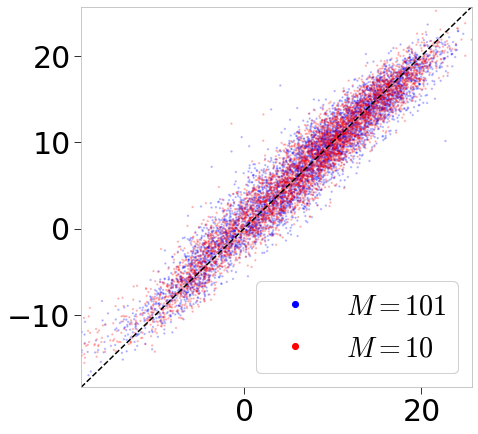

In [7]:
from utility.plotting.scatter_diff import *

d1 = "doublePulse2017/results/ex_1_ann_feat/ann_pred.npz"
d2 = "doublePulse2017/results/ex_1_ann_feat/ann_10_feat_pred.npz"

string_d = {
    "quantity": "Delay",
    "unit": "fs",
    "label_1": r"$M=101$",
    "label_2": r"$M=10$",
}

scatter_diff(d1, d2, string_d)

#### Results of Feature Selection

As we can see, the feature selection has significantly decreased the number of features used from >100 to 10, while leaving the prediction quality close to identical.

### Other Estimators

To benchmark our ANN, we also use linear models and gradient boosting estimators and perform the same analysis.

In [3]:
from utility.pipelines.gb import *
from utility.pipelines.lin import *

/home/karim/PycharmProjects/XFEL-ML/utility/plotting/plot_fit.py:5: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use("./utility/plotting/styling.mplstyle")
/home/karim/PycharmProjects/XFEL-ML/utility/plotting/plot_features.py:3: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use("./utility/plotting/styling.mplstyle")  # use styling file


            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


15.0


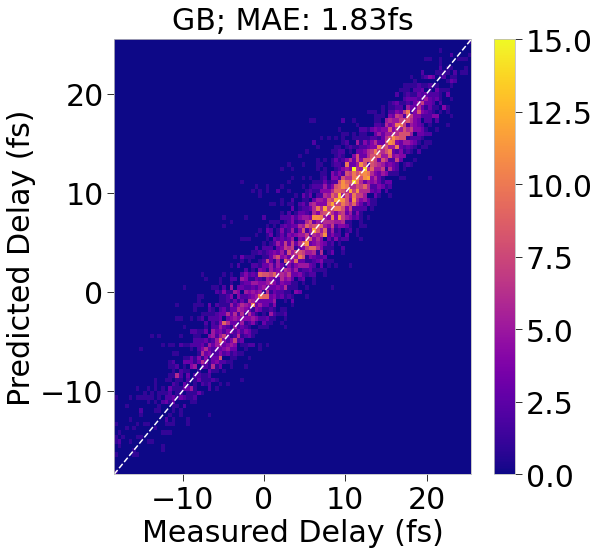

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

<Figure size 432x288 with 0 Axes>

In [4]:
gb_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/gb_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/xgb_delays_hist2d"
}

gb_pipeline(data, gb_str_data)

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

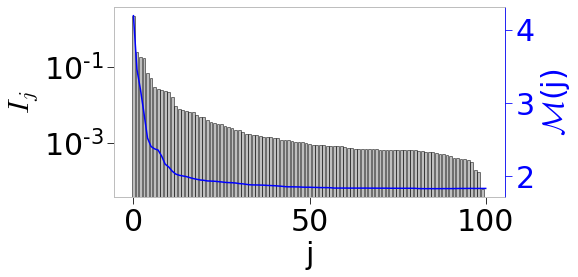

Index(['ebeamEnergyBC2', 'ebeamLTU450', 'ebeamDumpCharge', 'ebeamPkCurrBC1',
       'ebeamLTU250', 'AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure',
       'AMO:LMP:VG:21:PRESS', 'ebeamXTCAVPhase', 'FBCK:FB04:LG01:DL2VERNIER',
       'ebeamL3Energy'],
      dtype='object')
            ebeamEnergyBC2  ebeamLTU450  ebeamDumpCharge  ebeamPkCurrBC1  \
train_mean       -0.032178     0.206999     1.062706e+09      119.669862   
train_std         0.248814     0.224148     2.387308e+07        5.166623   
test_mean        -0.035393     0.208759     1.062331e+09      119.608020   
test_std          0.253537     0.227424     2.385365e+07        5.160910   

            ebeamLTU250  AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure  \
train_mean    -0.130344                            2.525509e-04   
train_std      0.217400                            6.205297e-08   
test_mean     -0.131970                            2.525516e-04   
test_std       0.220466                            7.948282e-08   

            AMO:L

<Figure size 432x288 with 0 Axes>

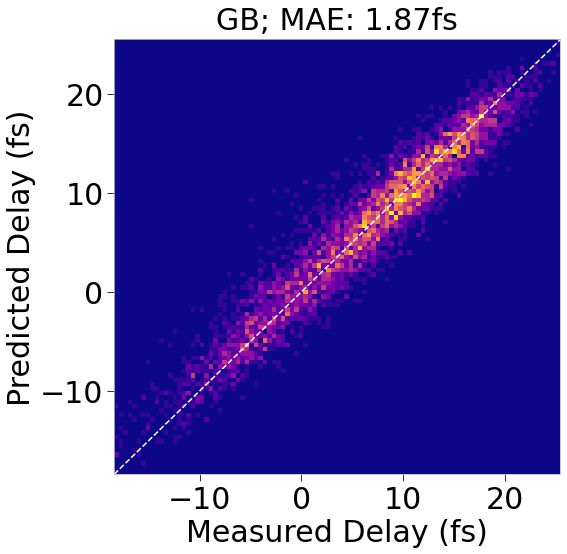

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2),
 Index(['ebeamEnergyBC2', 'ebeamLTU450', 'ebeamDumpCharge', 'ebeamPkCurrBC1',
        'ebeamLTU250', 'AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure',
        'AMO:LMP:VG:21:PRESS', 'ebeamXTCAVPhase', 'FBCK:FB04:LG01:DL2VERNIER',
        'ebeamL3Energy'],
       dtype='object'))

<Figure size 432x288 with 0 Axes>

In [5]:
gb_feat_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/gb_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/xgb_low_delays_hist2d"
}

gb_feature_pipeline(data, gb_feat_str_data)

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

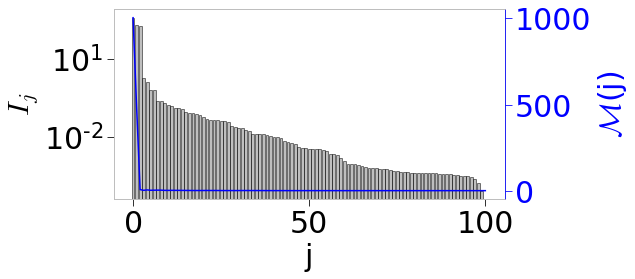

Index(['ebeamL3Energy', 'ebeamLTU250', 'ebeamLTU450', 'ebeamEnergyBC2',
       'HVCH:FEE1:242:VoltageMeasure', 'HVCH:FEE1:361:VoltageMeasure',
       'HVCH:FEE1:241:VoltageMeasure',
       'AMO:R14:IOC:21:VHS8:CH2:VoltageMeasure',
       'AMO:R14:IOC:21:VHS8:CH2:CurrentMeasure', 'ebeamDumpCharge'],
      dtype='object')
14.0


<Figure size 432x288 with 0 Axes>

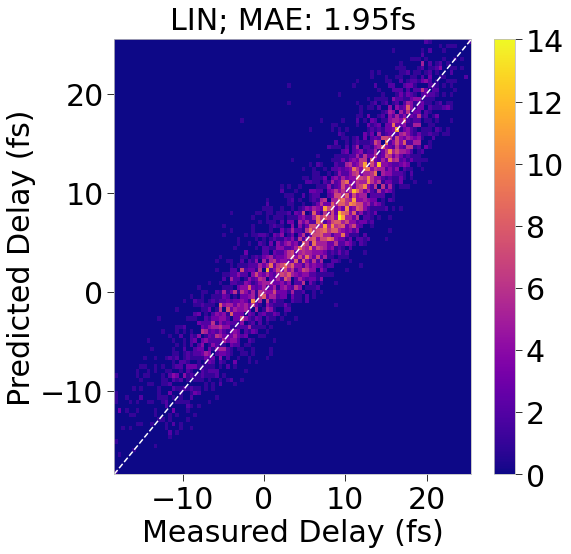

(LinearRegression(),
 Index(['ebeamL3Energy', 'ebeamLTU250', 'ebeamLTU450', 'ebeamEnergyBC2',
        'HVCH:FEE1:242:VoltageMeasure', 'HVCH:FEE1:361:VoltageMeasure',
        'HVCH:FEE1:241:VoltageMeasure',
        'AMO:R14:IOC:21:VHS8:CH2:VoltageMeasure',
        'AMO:R14:IOC:21:VHS8:CH2:CurrentMeasure', 'ebeamDumpCharge'],
       dtype='object'))

<Figure size 432x288 with 0 Axes>

In [6]:
lin_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/lin_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/lin_low_delays_hist2d"
}

lin_feature_pipeline(data, lin_str_data)